In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing # to normalize the data and to convert non-numeric values to numeric values
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [2]:
df = pd.read_csv('Rental-Contracts-Non-Landed-Housing-Dev - removedNA.csv')
# df.head()
print(df.columns)

Index(['S/N', 'Building/Project Name', 'Street Name', 'Postal District',
       'Type', 'No. of Bedroom(for Non-Landed Only)', 'Monthly Gross Rent($)',
       'Floor Area (sq ft)', 'Lease Commencement Date'],
      dtype='object')


In [3]:
# Converting the non-numeric data to numeric
# In order to train the K-Nearest Neighbor Classifier we must convert any string data into some kind of a number.
#  sklearn has a method that can do this.

# Start by creating a label encoder object and then use
# that to encode each column of data into integers
le = preprocessing.LabelEncoder()

# The method fit_transform() takes a list (each of the columns) and will return an array containing new values.
building_name = le.fit_transform(list(df["Building/Project Name"]))
street_name = le.fit_transform(list(df["Street Name"]))
postal_district = le.fit_transform(list(df["Postal District"]))
property_type = le.fit_transform(list(df["Type"]))
floor_area = le.fit_transform(list(df["Floor Area (sq ft)"]))
lease_date = le.fit_transform(list(df["Lease Commencement Date"]))
# num_of_bedrooms = le.fit_transform(list(df["No. of Bedroom(for Non-Landed Only)"]))
# monthly_rent = le.fit_transform(list(df["Monthly Gross Rent($)"]))
num_of_bedrooms = (list(df["No. of Bedroom(for Non-Landed Only)"]))
monthly_rent = (list(df["Monthly Gross Rent($)"]))

print(property_type)
print(building_name)
print(street_name)
print(floor_area)
print(lease_date)
print(postal_district)
#print(num_of_bedrooms)
#print(monthly_rent)


[0 0 0 ... 0 0 0]
[ 482 1920  898 ...  251  209 1319]
[231 599 441 ... 726  77 586]
[27 25  1 ... 27 24 25]
[19 19 19 ... 35 35 35]
[ 2  0  0 ... 24 25 26]


In [7]:
predict = "Monthly Gross Rent($)"

# create a data set by excluding some of the columns
# This is the input data
# Recombine the data into a feature list and a label list
# features
X = list(zip(property_type, building_name, street_name, floor_area, 
             lease_date, postal_district, num_of_bedrooms, monthly_rent)) 
# labels
y = list(monthly_rent)

# Finally we will split our data into training and testing data using the same process seen previously.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)


"""
# How to save a better version of model?
# Continue to keep save a model, by using a loop
# File generation needs to be done only once.
        # Once this is generated the above linear model and file saving can be deleted
best_accuracy = 0
for _ in range(30):
    # separate data into train and test data
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    # print(X_train, 'X_train')    # print( X_test, 'X_test')    # print(y_train, 'y_train')    # print(y_test, 'y_test')

    linear = linear_model.LinearRegression()
    linear.fit(X_train, y_train)
    accuracy = linear.score(X_test, y_test)
    print('Accuracy', accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        # Save the model using pickle
        # File generation needs to be done only once.
        # Once this is generated the above linear model and file saving can be deleted
        with open("RentModel.pickle", "wb") as f:
            pickle.dump(linear, f)
"""
    
# Read the pickle file
pickle_in = open("RentModel.pickle", "rb")
# load that read model into linear model
linear = pickle.load(pickle_in)

print('Coefficient: ', linear.coef_)
print('Intercept: ', linear.intercept_)

predictions = linear.predict(X_test)

print('prediction', '\t', '\t','X_test', '\t', '\t','y_test' )
for index in range(len(predictions)):
    print('--------------------------------------------------------------------------------------------------')
    print(predictions[index], '\t',  X_test[index], '\t', y_test[index])

# for index in range(len(predictions)):
#     print('--------------------------------------------------------------------------------------------------')
#     print('prediction: ', predictions[index] )
#     print( 'X_test[Postal District]: ', X_test.iloc[index]['Postal District'])
#     print( 'X_test[No. of Bedroom]: ', X_test.iloc[index]['No. of Bedroom(for Non-Landed Only)'])
#     print( 'X_test[Monthly Gross Rent($)]: ', X_test.iloc[index]['Monthly Gross Rent($)'])
#     print( 'y_test', y_test.iloc[index])





Coefficient:  [ 0.00000000e+00 -6.66133815e-16 -4.44089210e-16 -8.28417196e-15
  9.27806009e-16  3.66753069e-15  2.56272380e-13  1.00000000e+00]
Intercept:  -2.7284841053187847e-12
prediction 	 	 X_test 	 	 y_test
--------------------------------------------------------------------------------------------------
5350.000000000003 	 (0, 49, 457, 4, 13, 14, 3, 5350) 	 5350
--------------------------------------------------------------------------------------------------
2919.9999999999995 	 (0, 165, 703, 27, 4, 4, 2, 2920) 	 2920
--------------------------------------------------------------------------------------------------
4100.000000000001 	 (0, 217, 319, 26, 37, 3, 2, 4100) 	 4100
--------------------------------------------------------------------------------------------------
13500.000000000007 	 (0, 1968, 29, 29, 36, 9, 4, 13500) 	 13500
--------------------------------------------------------------------------------------------------
2149.999999999999 	 (0, 5, 598, 22, 55, 10, 1

2499.999999999998 	 (0, 1751, 455, 23, 33, 12, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
1899.9999999999989 	 (0, 505, 243, 23, 59, 13, 1, 1900) 	 1900
--------------------------------------------------------------------------------------------------
3000.0 	 (0, 97, 420, 27, 54, 13, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
4700.000000000001 	 (0, 1119, 360, 0, 41, 10, 2, 4700) 	 4700
--------------------------------------------------------------------------------------------------
1799.9999999999993 	 (0, 108, 175, 26, 10, 16, 3, 1800) 	 1800
--------------------------------------------------------------------------------------------------
1849.9999999999975 	 (0, 1918, 660, 22, 29, 15, 1, 1850) 	 1850
--------------------------------------------------------------------------------------------------
4500.000000000001 	 (0, 1574, 78, 1, 55, 

3499.999999999999 	 (0, 1966, 548, 25, 52, 9, 2, 3500) 	 3500
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 1654, 39, 26, 57, 15, 3, 3000) 	 3000
--------------------------------------------------------------------------------------------------
3100.000000000001 	 (0, 131, 32, 1, 9, 15, 3, 3100) 	 3100
--------------------------------------------------------------------------------------------------
3100.0 	 (0, 1573, 32, 4, 3, 15, 4, 3100) 	 3100
--------------------------------------------------------------------------------------------------
1699.9999999999977 	 (0, 1505, 551, 24, 44, 14, 1, 1700) 	 1700
--------------------------------------------------------------------------------------------------
1999.9999999999989 	 (0, 496, 411, 25, 4, 14, 2, 2000) 	 2000
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 1025, 517, 27, 26, 17, 

2799.999999999999 	 (0, 804, 324, 25, 5, 8, 1, 2800) 	 2800
--------------------------------------------------------------------------------------------------
4000.000000000001 	 (0, 950, 360, 0, 7, 10, 2, 4000) 	 4000
--------------------------------------------------------------------------------------------------
8000.0000000000055 	 (0, 142, 505, 11, 24, 8, 3, 8000) 	 8000
--------------------------------------------------------------------------------------------------
2900.0 	 (0, 924, 516, 0, 44, 4, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
3599.999999999999 	 (0, 1959, 503, 24, 25, 8, 1, 3600) 	 3600
--------------------------------------------------------------------------------------------------
2899.9999999999995 	 (0, 721, 184, 24, 32, 21, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
3800.0 	 (0, 1528, 538, 1, 23, 2, 3, 3800) 	 3800


--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 1092, 274, 25, 1, 11, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
1899.9999999999984 	 (0, 1357, 187, 22, 42, 13, 2, 1900) 	 1900
--------------------------------------------------------------------------------------------------
2549.999999999999 	 (0, 816, 111, 27, 42, 21, 2, 2550) 	 2550
--------------------------------------------------------------------------------------------------
2999.999999999998 	 (0, 1775, 583, 24, 6, 8, 1, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2799.9999999999995 	 (0, 768, 515, 2, 24, 4, 3, 2800) 	 2800
--------------------------------------------------------------------------------------------------
7800.000000000005 	 (0, 142, 505, 29, 17, 8, 5, 7800) 	 7800
----------------------------------

4800.000000000002 	 (0, 816, 111, 12, 23, 21, 4, 4800) 	 4800
--------------------------------------------------------------------------------------------------
3500.0 	 (0, 480, 104, 27, 2, 0, 2, 3500) 	 3500
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 1313, 528, 1, 17, 19, 3, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2899.999999999998 	 (0, 1840, 703, 26, 20, 4, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
8600.000000000007 	 (0, 82, 21, 11, 8, 9, 4, 8600) 	 8600
--------------------------------------------------------------------------------------------------
4300.000000000001 	 (0, 1292, 665, 4, 41, 14, 3, 4300) 	 4300
--------------------------------------------------------------------------------------------------
3100.0000000000005 	 (0, 305, 406, 5, 41, 18, 3, 3

1999.9999999999986 	 (0, 831, 188, 26, 34, 13, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
3150.000000000001 	 (0, 108, 175, 5, 27, 16, 3, 3150) 	 3150
--------------------------------------------------------------------------------------------------
4200.000000000002 	 (0, 176, 705, 5, 32, 4, 4, 4200) 	 4200
--------------------------------------------------------------------------------------------------
2599.999999999999 	 (0, 1678, 304, 27, 27, 21, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
2900.0 	 (0, 440, 143, 27, 49, 14, 3, 2900) 	 2900
--------------------------------------------------------------------------------------------------
2399.999999999998 	 (0, 1979, 36, 24, 12, 15, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
3600.0000000000005 	 (0, 1033, 331, 2, 59, 8, 

4800.000000000002 	 (0, 895, 601, 7, 32, 14, 3, 4800) 	 4800
--------------------------------------------------------------------------------------------------
2850.0 	 (0, 923, 603, 3, 28, 17, 3, 2850) 	 2850
--------------------------------------------------------------------------------------------------
3000.000000000001 	 (0, 48, 545, 3, 46, 18, 4, 3000) 	 3000
--------------------------------------------------------------------------------------------------
5600.000000000003 	 (0, 217, 319, 2, 52, 3, 3, 5600) 	 5600
--------------------------------------------------------------------------------------------------
3100.000000000001 	 (0, 379, 76, 27, 28, 7, 3, 3100) 	 3100
--------------------------------------------------------------------------------------------------
2399.9999999999986 	 (0, 1314, 519, 26, 34, 17, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
1999.9999999999986 	 (0, 625, 198, 23, 9, 13, 1, 20

5556.000000000002 	 (0, 1728, 488, 11, 14, 3, 4, 5556) 	 5556
--------------------------------------------------------------------------------------------------
2600.0 	 (0, 81, 36, 26, 34, 15, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
2899.9999999999995 	 (0, 638, 668, 26, 47, 3, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
3700.000000000001 	 (0, 139, 35, 26, 18, 15, 2, 3700) 	 3700
--------------------------------------------------------------------------------------------------
1799.9999999999984 	 (0, 717, 190, 22, 28, 18, 1, 1800) 	 1800
--------------------------------------------------------------------------------------------------
8500.000000000004 	 (0, 1824, 557, 11, 2, 9, 3, 8500) 	 8500
--------------------------------------------------------------------------------------------------
4000.0000000000014 	 (0, 385, 343, 2, 6, 9, 3, 4

3749.9999999999995 	 (0, 1765, 503, 24, 4, 8, 2, 3750) 	 3750
--------------------------------------------------------------------------------------------------
3500.0 	 (0, 1183, 548, 4, 29, 2, 2, 3500) 	 3500
--------------------------------------------------------------------------------------------------
4301.000000000001 	 (0, 874, 516, 5, 10, 4, 3, 4301) 	 4301
--------------------------------------------------------------------------------------------------
3800.0 	 (0, 1400, 487, 27, 57, 6, 2, 3800) 	 3800
--------------------------------------------------------------------------------------------------
2299.9999999999986 	 (0, 798, 338, 24, 22, 18, 1, 2300) 	 2300
--------------------------------------------------------------------------------------------------
3650.0 	 (0, 1673, 125, 0, 16, 3, 2, 3650) 	 3650
--------------------------------------------------------------------------------------------------
1899.9999999999975 	 (0, 1987, 543, 23, 16, 18, 1, 1900) 	 1900
------

2499.999999999999 	 (0, 721, 184, 24, 1, 21, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
1749.9999999999984 	 (0, 388, 517, 22, 37, 17, 1, 1750) 	 1750
--------------------------------------------------------------------------------------------------
2599.999999999999 	 (0, 1363, 187, 27, 59, 13, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
3500.0000000000005 	 (0, 762, 317, 4, 26, 18, 3, 3500) 	 3500
--------------------------------------------------------------------------------------------------
4000.0000000000014 	 (0, 234, 659, 3, 32, 15, 3, 4000) 	 4000
--------------------------------------------------------------------------------------------------
1699.9999999999984 	 (0, 807, 377, 22, 34, 13, 1, 1700) 	 1700
--------------------------------------------------------------------------------------------------
3500.0000000000005 	 (0, 39, 615

2999.9999999999986 	 (0, 1719, 265, 24, 38, 9, 1, 3000) 	 3000
--------------------------------------------------------------------------------------------------
6700.000000000004 	 (0, 1472, 204, 4, 41, 8, 3, 6700) 	 6700
--------------------------------------------------------------------------------------------------
4300.000000000001 	 (0, 1139, 3, 4, 34, 10, 3, 4300) 	 4300
--------------------------------------------------------------------------------------------------
3800.0000000000005 	 (0, 461, 5, 25, 2, 2, 2, 3800) 	 3800
--------------------------------------------------------------------------------------------------
1879.9999999999989 	 (0, 462, 42, 23, 49, 15, 1, 1880) 	 1880
--------------------------------------------------------------------------------------------------
3000.0 	 (0, 343, 555, 27, 24, 14, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
3400.0 	 (0, 62, 156, 23, 24, 1, 1, 3400) 	 3400
-

1899.999999999998 	 (0, 1362, 609, 22, 59, 13, 1, 1900) 	 1900
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 1717, 433, 22, 8, 8, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2249.9999999999986 	 (0, 1513, 230, 27, 55, 20, 2, 2250) 	 2250
--------------------------------------------------------------------------------------------------
2949.999999999999 	 (0, 1298, 622, 27, 1, 8, 2, 2950) 	 2950
--------------------------------------------------------------------------------------------------
4000.000000000001 	 (0, 89, 5, 27, 27, 2, 2, 4000) 	 4000
--------------------------------------------------------------------------------------------------
3299.9999999999995 	 (0, 655, 330, 23, 12, 2, 1, 3300) 	 3300
--------------------------------------------------------------------------------------------------
1699.9999999999986 	 (0, 543, 72, 22

3400.0 	 (0, 875, 523, 27, 7, 13, 2, 3400) 	 3400
--------------------------------------------------------------------------------------------------
5200.000000000003 	 (0, 397, 121, 3, 13, 13, 3, 5200) 	 5200
--------------------------------------------------------------------------------------------------
2799.999999999999 	 (0, 1523, 522, 0, 3, 18, 3, 2800) 	 2800
--------------------------------------------------------------------------------------------------
2049.9999999999986 	 (0, 1275, 576, 0, 29, 23, 2, 2050) 	 2050
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 1948, 93, 3, 0, 9, 3, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2699.9999999999995 	 (0, 444, 419, 27, 9, 13, 3, 2700) 	 2700
--------------------------------------------------------------------------------------------------
3299.9999999999995 	 (0, 1411, 194, 0, 6, 9, 2, 3

5000.000000000002 	 (0, 1785, 8, 2, 38, 14, 3, 5000) 	 5000
--------------------------------------------------------------------------------------------------
2299.999999999999 	 (0, 1124, 64, 27, 0, 22, 2, 2300) 	 2300
--------------------------------------------------------------------------------------------------
4300.000000000002 	 (0, 128, 475, 5, 34, 12, 4, 4300) 	 4300
--------------------------------------------------------------------------------------------------
1699.9999999999986 	 (0, 19, 377, 22, 6, 13, 1, 1700) 	 1700
--------------------------------------------------------------------------------------------------
3750.0 	 (0, 1400, 487, 27, 20, 6, 2, 3750) 	 3750
--------------------------------------------------------------------------------------------------
3200.0000000000005 	 (0, 139, 35, 26, 49, 15, 2, 3200) 	 3200
--------------------------------------------------------------------------------------------------
1849.9999999999984 	 (0, 817, 302, 23, 32, 21, 1, 

2699.999999999999 	 (0, 1231, 695, 2, 58, 18, 3, 2700) 	 2700
--------------------------------------------------------------------------------------------------
2699.999999999999 	 (0, 1842, 97, 1, 31, 22, 3, 2700) 	 2700
--------------------------------------------------------------------------------------------------
3700.000000000001 	 (0, 268, 262, 27, 52, 2, 2, 3700) 	 3700
--------------------------------------------------------------------------------------------------
1999.9999999999984 	 (0, 806, 590, 23, 20, 18, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
4500.0 	 (0, 1769, 573, 26, 50, 4, 1, 4500) 	 4500
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 753, 664, 23, 4, 14, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
4500.000000000001 	 (0, 432, 181, 24, 12, 6, 1

3300.0 	 (0, 762, 317, 5, 53, 18, 3, 3300) 	 3300
--------------------------------------------------------------------------------------------------
3799.9999999999995 	 (0, 1834, 562, 0, 22, 8, 2, 3800) 	 3800
--------------------------------------------------------------------------------------------------
2199.999999999999 	 (0, 530, 171, 26, 7, 14, 2, 2200) 	 2200
--------------------------------------------------------------------------------------------------
4000.0000000000014 	 (0, 732, 295, 5, 26, 9, 4, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2099.999999999999 	 (0, 500, 175, 27, 1, 16, 2, 2100) 	 2100
--------------------------------------------------------------------------------------------------
3300.000000000001 	 (0, 277, 87, 0, 31, 14, 3, 3300) 	 3300
--------------------------------------------------------------------------------------------------
1799.9999999999975 	 (0, 1905, 685, 22, 52, 7, 1, 1

--------------------------------------------------------------------------------------------------
7000.000000000004 	 (0, 1042, 127, 2, 8, 8, 3, 7000) 	 7000
--------------------------------------------------------------------------------------------------
3399.9999999999995 	 (0, 901, 442, 24, 52, 0, 1, 3400) 	 3400
--------------------------------------------------------------------------------------------------
1599.9999999999977 	 (0, 1456, 384, 22, 58, 13, 1, 1600) 	 1600
--------------------------------------------------------------------------------------------------
2899.9999999999986 	 (0, 1055, 494, 23, 26, 4, 1, 2900) 	 2900
--------------------------------------------------------------------------------------------------
3528.000000000001 	 (0, 258, 84, 2, 11, 8, 2, 3528) 	 3528
--------------------------------------------------------------------------------------------------
3299.999999999999 	 (0, 1890, 451, 27, 26, 19, 2, 3300) 	 3300
-----------------------------------

--------------------------------------------------------------------------------------------------
3800.000000000001 	 (0, 1012, 102, 2, 47, 8, 3, 3800) 	 3800
--------------------------------------------------------------------------------------------------
1999.999999999999 	 (0, 241, 576, 27, 29, 23, 2, 2000) 	 2000
--------------------------------------------------------------------------------------------------
3299.9999999999986 	 (0, 1770, 441, 24, 6, 0, 1, 3300) 	 3300
--------------------------------------------------------------------------------------------------
2599.9999999999995 	 (0, 1114, 225, 1, 14, 18, 3, 2600) 	 2600
--------------------------------------------------------------------------------------------------
15000.000000000007 	 (0, 1733, 498, 15, 42, 8, 4, 15000) 	 15000
--------------------------------------------------------------------------------------------------
2199.9999999999986 	 (0, 960, 464, 23, 28, 11, 1, 2200) 	 2200
------------------------------

7200.000000000005 	 (0, 544, 69, 8, 58, 20, 4, 7200) 	 7200
--------------------------------------------------------------------------------------------------
4200.000000000001 	 (0, 1229, 473, 8, 9, 9, 4, 4200) 	 4200
--------------------------------------------------------------------------------------------------
4900.000000000002 	 (0, 1822, 254, 3, 21, 4, 4, 4900) 	 4900
--------------------------------------------------------------------------------------------------
5600.000000000003 	 (0, 346, 444, 13, 59, 14, 3, 5600) 	 5600
--------------------------------------------------------------------------------------------------
2500.0000000000005 	 (0, 113, 25, 1, 58, 11, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2700.0 	 (0, 465, 175, 2, 49, 16, 3, 2700) 	 2700
--------------------------------------------------------------------------------------------------
1999.9999999999984 	 (0, 1252, 589, 25, 42, 18, 2, 2

6600.000000000003 	 (0, 1395, 622, 8, 27, 8, 4, 6600) 	 6600
--------------------------------------------------------------------------------------------------
3100.0 	 (0, 1205, 254, 1, 32, 4, 3, 3100) 	 3100
--------------------------------------------------------------------------------------------------
2649.9999999999995 	 (0, 1368, 69, 3, 12, 9, 3, 2650) 	 2650
--------------------------------------------------------------------------------------------------
2900.0 	 (0, 1105, 300, 3, 35, 21, 3, 2900) 	 2900
--------------------------------------------------------------------------------------------------
2750.0000000000005 	 (0, 256, 84, 1, 59, 8, 3, 2750) 	 2750
--------------------------------------------------------------------------------------------------
3399.999999999999 	 (0, 1052, 599, 23, 56, 0, 1, 3400) 	 3400
--------------------------------------------------------------------------------------------------
1799.9999999999982 	 (0, 1031, 25, 22, 1, 11, 1, 1800) 	 1800

5000.000000000002 	 (0, 1260, 566, 0, 56, 8, 3, 5000) 	 5000
--------------------------------------------------------------------------------------------------
2399.9999999999986 	 (0, 1319, 586, 26, 22, 26, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2599.9999999999986 	 (0, 1999, 516, 0, 59, 4, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
4400.000000000002 	 (0, 336, 298, 2, 25, 14, 3, 4400) 	 4400
--------------------------------------------------------------------------------------------------
3399.9999999999986 	 (0, 1769, 573, 27, 10, 4, 1, 3400) 	 3400
--------------------------------------------------------------------------------------------------
3500.0000000000005 	 (0, 275, 12, 26, 40, 19, 2, 3500) 	 3500
--------------------------------------------------------------------------------------------------
7500.000000000005 	 (0, 337, 319,

2999.999999999999 	 (0, 1331, 631, 26, 47, 14, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2300.0 	 (0, 218, 174, 2, 55, 16, 3, 2300) 	 2300
--------------------------------------------------------------------------------------------------
5307.000000000003 	 (0, 275, 12, 7, 7, 19, 3, 5307) 	 5307
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 1178, 657, 1, 54, 17, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
6000.000000000002 	 (0, 1282, 648, 5, 58, 10, 2, 6000) 	 6000
--------------------------------------------------------------------------------------------------
3600.0 	 (0, 1710, 127, 23, 43, 8, 1, 3600) 	 3600
--------------------------------------------------------------------------------------------------
5300.000000000002 	 (0, 1553, 4, 11, 55, 2, 4, 5300) 	 5300

2999.9999999999995 	 (0, 1800, 69, 0, 2, 20, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
3200.0000000000005 	 (0, 312, 335, 26, 26, 7, 2, 3200) 	 3200
--------------------------------------------------------------------------------------------------
5900.000000000003 	 (0, 1137, 521, 3, 28, 8, 3, 5900) 	 5900
--------------------------------------------------------------------------------------------------
4800.000000000003 	 (0, 753, 664, 3, 2, 14, 3, 4800) 	 4800
--------------------------------------------------------------------------------------------------
7500.000000000004 	 (0, 1934, 220, 13, 7, 9, 4, 7500) 	 7500
--------------------------------------------------------------------------------------------------
1999.9999999999989 	 (0, 722, 354, 23, 21, 18, 2, 2000) 	 2000
--------------------------------------------------------------------------------------------------
2699.9999999999986 	 (0, 1808, 592, 0,

4300.000000000002 	 (0, 700, 229, 2, 8, 8, 3, 4300) 	 4300
--------------------------------------------------------------------------------------------------
6000.000000000004 	 (0, 89, 5, 8, 33, 2, 4, 6000) 	 6000
--------------------------------------------------------------------------------------------------
2299.9999999999986 	 (0, 1373, 47, 22, 52, 19, 1, 2300) 	 2300
--------------------------------------------------------------------------------------------------
3900.0000000000005 	 (0, 1251, 351, 6, 15, 8, 3, 3900) 	 3900
--------------------------------------------------------------------------------------------------
2199.999999999999 	 (0, 27, 233, 23, 40, 14, 1, 2200) 	 2200
--------------------------------------------------------------------------------------------------
4750.000000000003 	 (0, 343, 555, 6, 31, 14, 3, 4750) 	 4750
--------------------------------------------------------------------------------------------------
4100.000000000001 	 (0, 385, 343, 0, 9, 9, 

10800.000000000007 	 (0, 8, 153, 15, 5, 8, 4, 10800) 	 10800
--------------------------------------------------------------------------------------------------
2899.9999999999995 	 (0, 685, 218, 27, 14, 9, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
2700.0 	 (0, 161, 606, 27, 8, 18, 2, 2700) 	 2700
--------------------------------------------------------------------------------------------------
1699.9999999999977 	 (0, 1899, 178, 22, 49, 13, 1, 1700) 	 1700
--------------------------------------------------------------------------------------------------
3800.0 	 (0, 1264, 568, 26, 2, 9, 2, 3800) 	 3800
--------------------------------------------------------------------------------------------------
6056.000000000003 	 (0, 999, 483, 7, 41, 10, 4, 6056) 	 6056
--------------------------------------------------------------------------------------------------
6400.000000000003 	 (0, 1889, 75, 18, 31, 8, 4, 6400) 	 64

2199.9999999999995 	 (0, 333, 106, 22, 27, 2, 1, 2200) 	 2200
--------------------------------------------------------------------------------------------------
4100.000000000001 	 (0, 1180, 639, 1, 47, 2, 3, 4100) 	 4100
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 1133, 516, 4, 24, 4, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
5800.000000000004 	 (0, 544, 69, 6, 30, 20, 3, 5800) 	 5800
--------------------------------------------------------------------------------------------------
4763.0 	 (0, 1614, 452, 24, 28, 0, 1, 4763) 	 4763
--------------------------------------------------------------------------------------------------
1599.9999999999975 	 (0, 1465, 692, 21, 57, 18, 1, 1600) 	 1600
--------------------------------------------------------------------------------------------------
2499.9999999999995 	 (0, 1446, 149, 0, 16, 17, 

--------------------------------------------------------------------------------------------------
4400.000000000001 	 (0, 1227, 46, 2, 57, 8, 2, 4400) 	 4400
--------------------------------------------------------------------------------------------------
2299.999999999999 	 (0, 923, 603, 27, 59, 17, 2, 2300) 	 2300
--------------------------------------------------------------------------------------------------
2199.999999999998 	 (0, 1862, 53, 2, 1, 19, 1, 2200) 	 2200
--------------------------------------------------------------------------------------------------
3100.0000000000005 	 (0, 675, 150, 1, 18, 22, 3, 3100) 	 3100
--------------------------------------------------------------------------------------------------
3700.0000000000005 	 (0, 480, 104, 0, 15, 0, 2, 3700) 	 3700
--------------------------------------------------------------------------------------------------
5500.000000000001 	 (0, 1763, 489, 2, 45, 3, 2, 5500) 	 5500
----------------------------------------

1899.9999999999989 	 (0, 462, 42, 23, 6, 15, 1, 1900) 	 1900
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 949, 328, 23, 44, 8, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
1999.999999999999 	 (0, 463, 94, 24, 29, 22, 2, 2000) 	 2000
--------------------------------------------------------------------------------------------------
3700.000000000001 	 (0, 629, 202, 4, 53, 14, 3, 3700) 	 3700
--------------------------------------------------------------------------------------------------
3199.9999999999995 	 (0, 1604, 303, 0, 2, 21, 2, 3200) 	 3200
--------------------------------------------------------------------------------------------------
2299.999999999999 	 (0, 923, 603, 27, 58, 17, 2, 2300) 	 2300
--------------------------------------------------------------------------------------------------
7450.000000000004 	 (0, 1306, 583, 2,

--------------------------------------------------------------------------------------------------
1999.9999999999975 	 (0, 1964, 624, 21, 51, 4, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
2799.999999999999 	 (0, 1372, 47, 25, 12, 19, 1, 2800) 	 2800
--------------------------------------------------------------------------------------------------
2799.9999999999995 	 (0, 895, 601, 26, 22, 14, 2, 2800) 	 2800
--------------------------------------------------------------------------------------------------
2349.999999999999 	 (0, 1025, 517, 25, 56, 17, 2, 2350) 	 2350
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 753, 664, 23, 58, 14, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
3849.999999999999 	 (0, 1769, 573, 26, 56, 4, 1, 3850) 	 3850
------------------------------

--------------------------------------------------------------------------------------------------
2299.9999999999986 	 (0, 1736, 517, 26, 10, 17, 2, 2300) 	 2300
--------------------------------------------------------------------------------------------------
2399.9999999999986 	 (0, 721, 184, 22, 16, 21, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
3000.0000000000005 	 (0, 305, 406, 3, 1, 18, 3, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 923, 603, 27, 5, 17, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
3199.9999999999995 	 (0, 1677, 341, 25, 55, 21, 2, 3200) 	 3200
--------------------------------------------------------------------------------------------------
6500.000000000004 	 (0, 337, 319, 3, 39, 3, 3, 6500) 	 6500
--------------------------------

3600.0 	 (0, 1380, 156, 24, 59, 1, 2, 3600) 	 3600
--------------------------------------------------------------------------------------------------
2999.999999999999 	 (0, 1844, 395, 0, 25, 13, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2599.9999999999986 	 (0, 1980, 36, 0, 22, 15, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
6600.000000000003 	 (0, 1846, 680, 3, 38, 8, 3, 6600) 	 6600
--------------------------------------------------------------------------------------------------
2199.999999999999 	 (0, 1094, 509, 1, 53, 15, 3, 2200) 	 2200
--------------------------------------------------------------------------------------------------
5200.000000000002 	 (0, 1976, 166, 8, 22, 9, 3, 5200) 	 5200
--------------------------------------------------------------------------------------------------
3000.0 	 (0, 539, 610, 5, 48, 19, 3, 3000) 	 30

1999.9999999999984 	 (0, 943, 89, 22, 44, 13, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
3099.999999999999 	 (0, 1393, 474, 23, 38, 8, 1, 3100) 	 3100
--------------------------------------------------------------------------------------------------
2599.999999999999 	 (0, 1206, 593, 26, 12, 11, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
13000.000000000007 	 (0, 1616, 194, 29, 7, 9, 4, 13000) 	 13000
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 985, 481, 23, 34, 9, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2649.999999999999 	 (0, 1275, 576, 1, 3, 23, 3, 2650) 	 2650
--------------------------------------------------------------------------------------------------
2900.0 	 (0, 1084, 408, 4, 18, 1

2099.999999999998 	 (0, 1664, 212, 23, 55, 22, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
4200.0 	 (0, 1614, 452, 24, 21, 0, 1, 4200) 	 4200
--------------------------------------------------------------------------------------------------
1799.9999999999982 	 (0, 1320, 185, 25, 20, 26, 1, 1800) 	 1800
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 1322, 532, 25, 22, 12, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2299.999999999999 	 (0, 763, 256, 24, 26, 18, 2, 2300) 	 2300
--------------------------------------------------------------------------------------------------
4500.0 	 (0, 1706, 263, 27, 13, 9, 2, 4500) 	 4500
--------------------------------------------------------------------------------------------------
1999.9999999999984 	 (0, 868, 481, 21, 56, 9, 1, 20

3700.0000000000005 	 (0, 1702, 596, 6, 59, 11, 4, 3700) 	 3700
--------------------------------------------------------------------------------------------------
2099.9999999999986 	 (0, 1275, 576, 0, 6, 23, 3, 2100) 	 2100
--------------------------------------------------------------------------------------------------
7000.000000000004 	 (0, 899, 85, 6, 25, 0, 3, 7000) 	 7000
--------------------------------------------------------------------------------------------------
1999.9999999999982 	 (0, 1473, 236, 22, 2, 20, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
4000.0000000000014 	 (0, 1039, 7, 2, 47, 14, 3, 4000) 	 4000
--------------------------------------------------------------------------------------------------
3800.0000000000014 	 (0, 341, 32, 1, 16, 15, 3, 3800) 	 3800
--------------------------------------------------------------------------------------------------
6000.000000000002 	 (0, 1306, 583, 26

1699.9999999999977 	 (0, 1674, 327, 22, 28, 11, 1, 1700) 	 1700
--------------------------------------------------------------------------------------------------
6500.000000000003 	 (0, 1269, 316, 8, 14, 10, 4, 6500) 	 6500
--------------------------------------------------------------------------------------------------
6400.000000000003 	 (0, 1201, 481, 9, 47, 9, 3, 6400) 	 6400
--------------------------------------------------------------------------------------------------
4300.000000000001 	 (0, 217, 319, 26, 47, 3, 2, 4300) 	 4300
--------------------------------------------------------------------------------------------------
4200.000000000001 	 (0, 796, 339, 8, 59, 18, 4, 4200) 	 4200
--------------------------------------------------------------------------------------------------
2599.9999999999986 	 (0, 1750, 33, 27, 53, 6, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
3500.0000000000005 	 (0, 895, 601, 

3099.999999999999 	 (0, 2013, 719, 1, 30, 23, 3, 3100) 	 3100
--------------------------------------------------------------------------------------------------
5850.000000000003 	 (0, 1627, 131, 13, 31, 9, 3, 5850) 	 5850
--------------------------------------------------------------------------------------------------
1849.9999999999977 	 (0, 1918, 660, 24, 50, 15, 2, 1850) 	 1850
--------------------------------------------------------------------------------------------------
1899.9999999999986 	 (0, 671, 211, 25, 41, 22, 1, 1900) 	 1900
--------------------------------------------------------------------------------------------------
4000.0 	 (0, 1815, 713, 2, 27, 9, 3, 4000) 	 4000
--------------------------------------------------------------------------------------------------
14000.000000000011 	 (0, 1130, 218, 18, 29, 9, 4, 14000) 	 14000
--------------------------------------------------------------------------------------------------
12000.000000000011 	 (0, 1311, 113, 17, 

2899.999999999999 	 (0, 703, 704, 25, 6, 4, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
2999.9999999999986 	 (0, 1260, 566, 24, 10, 8, 1, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2099.9999999999977 	 (0, 1849, 731, 25, 39, 25, 2, 2100) 	 2100
--------------------------------------------------------------------------------------------------
5100.000000000001 	 (0, 802, 483, 27, 2, 10, 2, 5100) 	 5100
--------------------------------------------------------------------------------------------------
3150.0 	 (0, 551, 454, 24, 3, 7, 2, 3150) 	 3150
--------------------------------------------------------------------------------------------------
2299.999999999999 	 (0, 1105, 300, 0, 26, 21, 2, 2300) 	 2300
--------------------------------------------------------------------------------------------------
5500.000000000002 	 (0, 1604, 303, 4, 11, 21, 4

2799.999999999999 	 (0, 1313, 528, 1, 26, 19, 3, 2800) 	 2800
--------------------------------------------------------------------------------------------------
5000.000000000002 	 (0, 534, 172, 6, 17, 9, 2, 5000) 	 5000
--------------------------------------------------------------------------------------------------
3500.000000000001 	 (0, 321, 646, 4, 47, 20, 3, 3500) 	 3500
--------------------------------------------------------------------------------------------------
2349.9999999999995 	 (0, 134, 438, 26, 4, 11, 2, 2350) 	 2350
--------------------------------------------------------------------------------------------------
4000.0000000000014 	 (0, 397, 121, 0, 41, 13, 2, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2899.999999999999 	 (0, 1952, 279, 4, 31, 14, 3, 2900) 	 2900
--------------------------------------------------------------------------------------------------
7700.000000000005 	 (0, 343, 555, 13,

2199.9999999999986 	 (0, 1207, 226, 27, 16, 18, 2, 2200) 	 2200
--------------------------------------------------------------------------------------------------
8000.000000000005 	 (0, 1311, 113, 14, 21, 3, 3, 8000) 	 8000
--------------------------------------------------------------------------------------------------
3250.0 	 (0, 1654, 39, 0, 27, 15, 3, 3250) 	 3250
--------------------------------------------------------------------------------------------------
5700.000000000002 	 (0, 1146, 665, 8, 32, 14, 3, 5700) 	 5700
--------------------------------------------------------------------------------------------------
2850.0 	 (0, 269, 186, 27, 7, 13, 2, 2850) 	 2850
--------------------------------------------------------------------------------------------------
2599.999999999999 	 (0, 1625, 691, 0, 46, 15, 3, 2600) 	 2600
--------------------------------------------------------------------------------------------------
1999.9999999999989 	 (0, 505, 243, 23, 30, 13, 1, 2000) 

--------------------------------------------------------------------------------------------------
2799.9999999999995 	 (0, 461, 5, 22, 27, 2, 1, 2800) 	 2800
--------------------------------------------------------------------------------------------------
5750.000000000003 	 (0, 1047, 294, 2, 20, 9, 3, 5750) 	 5750
--------------------------------------------------------------------------------------------------
2399.9999999999995 	 (0, 531, 174, 0, 9, 16, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
3700.0000000000005 	 (0, 489, 599, 23, 34, 1, 2, 3700) 	 3700
--------------------------------------------------------------------------------------------------
2600.0 	 (0, 572, 183, 27, 33, 18, 3, 2600) 	 2600
--------------------------------------------------------------------------------------------------
6000.000000000003 	 (0, 1770, 441, 3, 40, 0, 3, 6000) 	 6000
--------------------------------------------------

2349.999999999999 	 (0, 1370, 458, 0, 28, 25, 3, 2350) 	 2350
--------------------------------------------------------------------------------------------------
3400.0000000000005 	 (0, 1061, 504, 2, 2, 8, 2, 3400) 	 3400
--------------------------------------------------------------------------------------------------
2799.9999999999986 	 (0, 1831, 650, 26, 53, 12, 2, 2800) 	 2800
--------------------------------------------------------------------------------------------------
4280.000000000001 	 (0, 873, 159, 1, 38, 14, 3, 4280) 	 4280
--------------------------------------------------------------------------------------------------
2949.9999999999986 	 (0, 1648, 716, 26, 49, 3, 1, 2950) 	 2950
--------------------------------------------------------------------------------------------------
4150.000000000002 	 (0, 385, 343, 1, 57, 9, 3, 4150) 	 4150
--------------------------------------------------------------------------------------------------
1999.9999999999986 	 (0, 1106, 174,

--------------------------------------------------------------------------------------------------
1549.9999999999977 	 (0, 1099, 669, 22, 26, 14, 1, 1550) 	 1550
--------------------------------------------------------------------------------------------------
2999.999999999999 	 (0, 1988, 655, 1, 38, 17, 3, 3000) 	 3000
--------------------------------------------------------------------------------------------------
3700.0 	 (0, 704, 192, 24, 33, 1, 1, 3700) 	 3700
--------------------------------------------------------------------------------------------------
3900.0 	 (0, 1930, 515, 2, 27, 4, 3, 3900) 	 3900
--------------------------------------------------------------------------------------------------
2099.9999999999986 	 (0, 472, 711, 22, 12, 11, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
4000.000000000001 	 (0, 1613, 103, 1, 14, 4, 3, 4000) 	 4000
--------------------------------------------------------

5700.000000000002 	 (0, 1380, 156, 27, 57, 1, 3, 5700) 	 5700
--------------------------------------------------------------------------------------------------
3999.9999999999995 	 (0, 1815, 713, 27, 36, 9, 2, 4000) 	 4000
--------------------------------------------------------------------------------------------------
5200.000000000001 	 (0, 1920, 599, 27, 38, 0, 2, 5200) 	 5200
--------------------------------------------------------------------------------------------------
4750.000000000002 	 (0, 1821, 683, 6, 3, 10, 4, 4750) 	 4750
--------------------------------------------------------------------------------------------------
4800.000000000001 	 (0, 898, 441, 2, 18, 0, 2, 4800) 	 4800
--------------------------------------------------------------------------------------------------
1999.9999999999977 	 (0, 1751, 455, 22, 38, 12, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 890, 433,

2049.9999999999995 	 (0, 396, 120, 24, 28, 12, 2, 2050) 	 2050
--------------------------------------------------------------------------------------------------
4700.000000000003 	 (0, 385, 343, 3, 33, 9, 3, 4700) 	 4700
--------------------------------------------------------------------------------------------------
4000.0000000000014 	 (0, 385, 343, 0, 3, 9, 2, 4000) 	 4000
--------------------------------------------------------------------------------------------------
1799.9999999999977 	 (0, 1256, 438, 22, 36, 11, 1, 1800) 	 1800
--------------------------------------------------------------------------------------------------
2900.0 	 (0, 234, 659, 27, 42, 15, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
2449.9999999999986 	 (0, 1716, 224, 27, 3, 18, 2, 2450) 	 2450
--------------------------------------------------------------------------------------------------
2099.999999999999 	 (0, 1320, 185, 2, 52, 26,

--------------------------------------------------------------------------------------------------
2399.9999999999995 	 (0, 1115, 111, 0, 22, 21, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2099.999999999998 	 (0, 1771, 384, 24, 11, 13, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
2399.999999999998 	 (0, 1265, 569, 22, 28, 9, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2850.0000000000005 	 (0, 105, 175, 6, 48, 16, 4, 2850) 	 2850
--------------------------------------------------------------------------------------------------
3049.999999999999 	 (0, 1241, 206, 25, 59, 2, 1, 3050) 	 3050
--------------------------------------------------------------------------------------------------
2299.9999999999986 	 (0, 1772, 657, 25, 18, 17, 2, 2300) 	 2300
------------------------------

5900.000000000004 	 (0, 198, 75, 15, 8, 8, 3, 5900) 	 5900
--------------------------------------------------------------------------------------------------
2899.9999999999986 	 (0, 1266, 571, 22, 14, 0, 1, 2900) 	 2900
--------------------------------------------------------------------------------------------------
4500.000000000002 	 (0, 385, 343, 3, 38, 9, 3, 4500) 	 4500
--------------------------------------------------------------------------------------------------
9500.000000000007 	 (0, 82, 21, 11, 3, 9, 4, 9500) 	 9500
--------------------------------------------------------------------------------------------------
3800.0000000000005 	 (0, 769, 640, 2, 44, 7, 3, 3800) 	 3800
--------------------------------------------------------------------------------------------------
4300.000000000001 	 (0, 1942, 336, 4, 3, 7, 4, 4300) 	 4300
--------------------------------------------------------------------------------------------------
2599.9999999999986 	 (0, 1564, 311, 24, 48, 9

3600.000000000001 	 (0, 165, 703, 1, 24, 4, 3, 3600) 	 3600
--------------------------------------------------------------------------------------------------
2249.9999999999986 	 (0, 974, 604, 23, 53, 17, 1, 2250) 	 2250
--------------------------------------------------------------------------------------------------
2399.9999999999986 	 (0, 1654, 39, 23, 1, 15, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
1899.9999999999986 	 (0, 889, 433, 22, 54, 8, 1, 1900) 	 1900
--------------------------------------------------------------------------------------------------
3599.9999999999995 	 (0, 1973, 665, 2, 24, 14, 3, 3600) 	 3600
--------------------------------------------------------------------------------------------------
2199.999999999999 	 (0, 1081, 174, 25, 49, 16, 2, 2200) 	 2200
--------------------------------------------------------------------------------------------------
4000.0000000000005 	 (0, 1213, 15

3100.0 	 (0, 929, 211, 2, 5, 22, 3, 3100) 	 3100
--------------------------------------------------------------------------------------------------
8000.000000000005 	 (0, 1630, 75, 12, 51, 8, 4, 8000) 	 8000
--------------------------------------------------------------------------------------------------
3200.0000000000005 	 (0, 862, 517, 5, 22, 17, 4, 3200) 	 3200
--------------------------------------------------------------------------------------------------
2500.0000000000005 	 (0, 246, 82, 5, 51, 22, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2799.9999999999995 	 (0, 385, 343, 24, 26, 9, 1, 2800) 	 2800
--------------------------------------------------------------------------------------------------
6500.000000000003 	 (0, 899, 85, 5, 34, 0, 3, 6500) 	 6500
--------------------------------------------------------------------------------------------------
6600.000000000003 	 (0, 1866, 569, 5, 8, 9, 3, 6600)

2999.9999999999986 	 (0, 1380, 156, 21, 38, 1, 1, 3000) 	 3000
--------------------------------------------------------------------------------------------------
1929.999999999999 	 (0, 308, 33, 25, 39, 6, 2, 1930) 	 1930
--------------------------------------------------------------------------------------------------
3200.0 	 (0, 1679, 211, 1, 10, 22, 3, 3200) 	 3200
--------------------------------------------------------------------------------------------------
1899.9999999999984 	 (0, 1109, 576, 25, 10, 23, 2, 1900) 	 1900
--------------------------------------------------------------------------------------------------
3400.000000000001 	 (0, 79, 37, 12, 29, 15, 3, 3400) 	 3400
--------------------------------------------------------------------------------------------------
4000.000000000002 	 (0, 188, 44, 0, 10, 6, 3, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2399.999999999998 	 (0, 1704, 516, 23, 9, 4, 1, 2

6800.000000000004 	 (0, 1062, 19, 6, 6, 8, 3, 6800) 	 6800
--------------------------------------------------------------------------------------------------
6700.000000000003 	 (0, 1066, 352, 0, 17, 8, 2, 6700) 	 6700
--------------------------------------------------------------------------------------------------
2699.9999999999986 	 (0, 1835, 272, 26, 14, 11, 2, 2700) 	 2700
--------------------------------------------------------------------------------------------------
6700.000000000004 	 (0, 1215, 324, 4, 52, 8, 3, 6700) 	 6700
--------------------------------------------------------------------------------------------------
2299.999999999999 	 (0, 1031, 25, 23, 8, 11, 2, 2300) 	 2300
--------------------------------------------------------------------------------------------------
2249.999999999999 	 (0, 1012, 692, 1, 28, 18, 3, 2250) 	 2250
--------------------------------------------------------------------------------------------------
11000.000000000007 	 (0, 1311, 113, 29

9500.000000000007 	 (0, 1197, 320, 8, 20, 3, 3, 9500) 	 9500
--------------------------------------------------------------------------------------------------
2999.9999999999986 	 (0, 1055, 494, 23, 42, 4, 1, 3000) 	 3000
--------------------------------------------------------------------------------------------------
8000.000000000005 	 (0, 1894, 483, 12, 5, 10, 3, 8000) 	 8000
--------------------------------------------------------------------------------------------------
3400.0 	 (0, 1626, 119, 8, 8, 22, 3, 3400) 	 3400
--------------------------------------------------------------------------------------------------
3250.0000000000005 	 (0, 312, 335, 26, 19, 7, 2, 3250) 	 3250
--------------------------------------------------------------------------------------------------
1849.9999999999977 	 (0, 1530, 665, 24, 23, 14, 1, 1850) 	 1850
--------------------------------------------------------------------------------------------------
2699.9999999999995 	 (0, 1059, 659, 26, 11, 

2599.9999999999986 	 (0, 2013, 719, 1, 26, 23, 3, 2600) 	 2600
--------------------------------------------------------------------------------------------------
3499.9999999999986 	 (0, 1770, 441, 23, 2, 0, 1, 3500) 	 3500
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 1092, 274, 26, 23, 11, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2999.999999999999 	 (0, 704, 192, 23, 3, 1, 1, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2199.9999999999986 	 (0, 505, 243, 24, 17, 13, 1, 2200) 	 2200
--------------------------------------------------------------------------------------------------
1999.9999999999977 	 (0, 1813, 656, 22, 47, 18, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
3700.0 	 (0, 1623, 538, 26, 4,

1599.9999999999986 	 (0, 218, 174, 24, 1, 16, 1, 1600) 	 1600
--------------------------------------------------------------------------------------------------
1999.9999999999984 	 (0, 811, 411, 22, 42, 14, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
1549.9999999999975 	 (0, 1353, 386, 22, 23, 13, 1, 1550) 	 1550
--------------------------------------------------------------------------------------------------
3007.999999999999 	 (0, 1596, 8, 24, 17, 14, 1, 3008) 	 3008
--------------------------------------------------------------------------------------------------
1799.9999999999977 	 (0, 1663, 247, 21, 57, 20, 1, 1800) 	 1800
--------------------------------------------------------------------------------------------------
4000.0000000000005 	 (0, 2019, 98, 4, 17, 22, 4, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 419, 

3200.0000000000005 	 (0, 312, 335, 26, 54, 7, 2, 3200) 	 3200
--------------------------------------------------------------------------------------------------
5500.000000000002 	 (0, 1555, 130, 2, 58, 9, 3, 5500) 	 5500
--------------------------------------------------------------------------------------------------
6300.000000000003 	 (0, 1669, 277, 2, 31, 8, 3, 6300) 	 6300
--------------------------------------------------------------------------------------------------
3000.0000000000005 	 (0, 360, 399, 2, 39, 13, 3, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2199.9999999999995 	 (0, 131, 32, 26, 1, 15, 2, 2200) 	 2200
--------------------------------------------------------------------------------------------------
2999.999999999999 	 (0, 1539, 282, 25, 21, 6, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
5800.000000000003 	 (0, 1710, 127, 0,

2849.9999999999995 	 (0, 385, 343, 24, 29, 9, 1, 2850) 	 2850
--------------------------------------------------------------------------------------------------
4300.000000000002 	 (0, 362, 675, 3, 53, 10, 3, 4300) 	 4300
--------------------------------------------------------------------------------------------------
2599.999999999999 	 (0, 1362, 609, 24, 24, 13, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
7000.000000000004 	 (0, 895, 601, 29, 8, 14, 4, 7000) 	 7000
--------------------------------------------------------------------------------------------------
3699.9999999999995 	 (0, 2026, 736, 1, 58, 9, 2, 3700) 	 3700
--------------------------------------------------------------------------------------------------
2349.999999999998 	 (0, 1750, 33, 25, 29, 6, 1, 2350) 	 2350
--------------------------------------------------------------------------------------------------
2749.9999999999995 	 (0, 837, 344, 2

2199.9999999999995 	 (0, 9, 8, 24, 44, 14, 2, 2200) 	 2200
--------------------------------------------------------------------------------------------------
2149.999999999998 	 (0, 1285, 597, 21, 12, 9, 1, 2150) 	 2150
--------------------------------------------------------------------------------------------------
4750.000000000003 	 (0, 312, 335, 4, 26, 7, 4, 4750) 	 4750
--------------------------------------------------------------------------------------------------
2099.999999999998 	 (0, 1254, 563, 27, 29, 18, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
2099.9999999999986 	 (0, 1573, 32, 27, 17, 15, 2, 2100) 	 2100
--------------------------------------------------------------------------------------------------
13300.000000000011 	 (0, 83, 21, 18, 6, 9, 4, 13300) 	 13300
--------------------------------------------------------------------------------------------------
3200.0 	 (0, 461, 5, 25, 24, 2, 2, 320

--------------------------------------------------------------------------------------------------
2399.9999999999986 	 (0, 753, 664, 23, 15, 14, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
3199.999999999999 	 (0, 1262, 680, 21, 55, 8, 1, 3200) 	 3200
--------------------------------------------------------------------------------------------------
3700.0000000000005 	 (0, 62, 156, 23, 9, 1, 1, 3700) 	 3700
--------------------------------------------------------------------------------------------------
3600.0000000000014 	 (0, 269, 186, 1, 26, 13, 3, 3600) 	 3600
--------------------------------------------------------------------------------------------------
4000.0000000000005 	 (0, 1742, 521, 0, 4, 8, 2, 4000) 	 4000
--------------------------------------------------------------------------------------------------
5000.000000000003 	 (0, 89, 5, 4, 47, 2, 3, 5000) 	 5000
-----------------------------------------

3399.9999999999995 	 (0, 908, 449, 23, 50, 8, 1, 3400) 	 3400
--------------------------------------------------------------------------------------------------
10200.000000000007 	 (0, 866, 361, 11, 44, 8, 2, 10200) 	 10200
--------------------------------------------------------------------------------------------------
2950.0 	 (0, 441, 661, 1, 18, 15, 3, 2950) 	 2950
--------------------------------------------------------------------------------------------------
3900.0000000000005 	 (0, 1100, 469, 0, 33, 8, 2, 3900) 	 3900
--------------------------------------------------------------------------------------------------
6200.000000000003 	 (0, 1959, 503, 1, 1, 8, 3, 6200) 	 6200
--------------------------------------------------------------------------------------------------
4800.000000000003 	 (0, 617, 194, 5, 29, 8, 3, 4800) 	 4800
--------------------------------------------------------------------------------------------------
2700.0 	 (0, 299, 592, 27, 8, 18, 2, 2700) 	 270

4500.000000000001 	 (0, 335, 33, 1, 28, 6, 1, 4500) 	 4500
--------------------------------------------------------------------------------------------------
2300.0 	 (0, 471, 77, 27, 10, 25, 3, 2300) 	 2300
--------------------------------------------------------------------------------------------------
8300.000000000007 	 (0, 1042, 127, 5, 22, 8, 4, 8300) 	 8300
--------------------------------------------------------------------------------------------------
2799.999999999999 	 (0, 1207, 226, 2, 25, 18, 2, 2800) 	 2800
--------------------------------------------------------------------------------------------------
2599.9999999999995 	 (0, 895, 601, 0, 19, 14, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
7008.000000000005 	 (0, 366, 315, 4, 53, 9, 3, 7008) 	 7008
--------------------------------------------------------------------------------------------------
3499.9999999999995 	 (0, 1180, 639, 26, 3, 2, 2, 350

2899.9999999999995 	 (0, 721, 184, 24, 58, 21, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
1599.9999999999977 	 (0, 1149, 511, 22, 6, 0, 1, 1600) 	 1600
--------------------------------------------------------------------------------------------------
2099.9999999999986 	 (0, 1178, 657, 25, 47, 17, 2, 2100) 	 2100
--------------------------------------------------------------------------------------------------
2399.999999999999 	 (0, 1637, 413, 0, 51, 14, 3, 2400) 	 2400
--------------------------------------------------------------------------------------------------
4400.0 	 (0, 1926, 562, 2, 36, 9, 2, 4400) 	 4400
--------------------------------------------------------------------------------------------------
1999.9999999999975 	 (0, 1987, 543, 23, 38, 18, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
1649.9999999999984 	 (0, 388, 517, 22, 3,

4000.0000000000014 	 (0, 319, 324, 1, 58, 8, 3, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2350.0 	 (0, 465, 175, 2, 19, 16, 3, 2350) 	 2350
--------------------------------------------------------------------------------------------------
2249.9999999999986 	 (0, 1204, 62, 0, 33, 22, 2, 2250) 	 2250
--------------------------------------------------------------------------------------------------
2149.999999999999 	 (0, 651, 170, 23, 33, 26, 2, 2150) 	 2150
--------------------------------------------------------------------------------------------------
2299.999999999999 	 (0, 806, 590, 25, 1, 18, 2, 2300) 	 2300
--------------------------------------------------------------------------------------------------
4400.000000000002 	 (0, 648, 129, 3, 55, 4, 3, 4400) 	 4400
--------------------------------------------------------------------------------------------------
3400.0000000000005 	 (0, 1481, 230, 5, 17, 20, 4, 

2199.999999999999 	 (0, 923, 603, 27, 21, 17, 2, 2200) 	 2200
--------------------------------------------------------------------------------------------------
5200.000000000002 	 (0, 1580, 457, 2, 2, 14, 3, 5200) 	 5200
--------------------------------------------------------------------------------------------------
1799.9999999999986 	 (0, 784, 259, 27, 41, 13, 2, 1800) 	 1800
--------------------------------------------------------------------------------------------------
2099.999999999999 	 (0, 27, 233, 23, 36, 14, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
3100.0 	 (0, 860, 1, 23, 21, 8, 2, 3100) 	 3100
--------------------------------------------------------------------------------------------------
2727.999999999999 	 (0, 1596, 8, 23, 47, 14, 1, 2728) 	 2728
--------------------------------------------------------------------------------------------------
3099.9999999999995 	 (0, 1980, 36, 1, 51, 15, 3, 3

--------------------------------------------------------------------------------------------------
13000.000000000007 	 (0, 1616, 194, 29, 9, 9, 3, 13000) 	 13000
--------------------------------------------------------------------------------------------------
4500.000000000001 	 (0, 846, 352, 1, 47, 8, 3, 4500) 	 4500
--------------------------------------------------------------------------------------------------
5900.000000000004 	 (0, 385, 343, 6, 28, 9, 3, 5900) 	 5900
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 721, 184, 24, 58, 21, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
3600.0 	 (0, 1260, 566, 26, 24, 8, 2, 3600) 	 3600
--------------------------------------------------------------------------------------------------
3700.000000000001 	 (0, 217, 319, 26, 24, 3, 2, 3700) 	 3700
------------------------------------------------

1999.9999999999993 	 (0, 149, 260, 25, 28, 4, 2, 2000) 	 2000
--------------------------------------------------------------------------------------------------
2749.9999999999995 	 (0, 1697, 108, 0, 50, 18, 3, 2750) 	 2750
--------------------------------------------------------------------------------------------------
4700.000000000002 	 (0, 928, 238, 1, 58, 2, 3, 4700) 	 4700
--------------------------------------------------------------------------------------------------
3649.9999999999995 	 (0, 1241, 206, 26, 38, 2, 1, 3650) 	 3650
--------------------------------------------------------------------------------------------------
5800.000000000004 	 (0, 198, 75, 13, 18, 8, 2, 5800) 	 5800
--------------------------------------------------------------------------------------------------
5000.000000000002 	 (0, 1241, 206, 2, 20, 2, 3, 5000) 	 5000
--------------------------------------------------------------------------------------------------
9000.000000000007 	 (0, 82, 21, 11, 0

2649.9999999999995 	 (0, 654, 676, 4, 21, 20, 3, 2650) 	 2650
--------------------------------------------------------------------------------------------------
4500.000000000002 	 (0, 480, 104, 0, 37, 0, 2, 4500) 	 4500
--------------------------------------------------------------------------------------------------
12000.000000000007 	 (0, 205, 665, 17, 25, 14, 4, 12000) 	 12000
--------------------------------------------------------------------------------------------------
3900.0000000000005 	 (0, 1961, 240, 1, 38, 11, 3, 3900) 	 3900
--------------------------------------------------------------------------------------------------
3500.0 	 (0, 1604, 303, 0, 20, 21, 2, 3500) 	 3500
--------------------------------------------------------------------------------------------------
6000.000000000003 	 (0, 1052, 599, 6, 54, 0, 3, 6000) 	 6000
--------------------------------------------------------------------------------------------------
2399.9999999999977 	 (0, 2001, 714, 22, 58, 

2899.999999999999 	 (0, 1952, 279, 1, 30, 14, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
1699.9999999999977 	 (0, 1671, 174, 22, 4, 16, 1, 1700) 	 1700
--------------------------------------------------------------------------------------------------
2900.0 	 (0, 1679, 211, 0, 50, 22, 3, 2900) 	 2900
--------------------------------------------------------------------------------------------------
2199.9999999999977 	 (0, 1877, 186, 22, 18, 13, 1, 2200) 	 2200
--------------------------------------------------------------------------------------------------
2500.0 	 (0, 1014, 97, 3, 37, 22, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2600.0000000000005 	 (0, 218, 174, 2, 51, 16, 3, 2600) 	 2600
--------------------------------------------------------------------------------------------------
6500.000000000003 	 (0, 1770, 441, 3, 0, 0, 3, 6500) 	

1799.9999999999982 	 (0, 987, 213, 22, 36, 22, 1, 1800) 	 1800
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 1098, 543, 27, 21, 18, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2049.999999999998 	 (0, 1980, 36, 25, 6, 15, 1, 2050) 	 2050
--------------------------------------------------------------------------------------------------
3400.0000000000005 	 (0, 1320, 185, 6, 50, 26, 4, 3400) 	 3400
--------------------------------------------------------------------------------------------------
3499.9999999999995 	 (0, 1987, 543, 1, 42, 18, 3, 3500) 	 3500
--------------------------------------------------------------------------------------------------
10500.000000000007 	 (0, 1976, 166, 29, 24, 9, 4, 10500) 	 10500
--------------------------------------------------------------------------------------------------
2049.9999999999977 	 (0, 184

2899.999999999999 	 (0, 1890, 451, 0, 49, 19, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
3099.999999999999 	 (0, 1406, 625, 24, 39, 1, 1, 3100) 	 3100
--------------------------------------------------------------------------------------------------
2999.999999999999 	 (0, 1607, 406, 27, 15, 18, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2599.9999999999995 	 (0, 798, 338, 25, 24, 18, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
2599.9999999999986 	 (0, 1310, 703, 25, 17, 4, 1, 2600) 	 2600
--------------------------------------------------------------------------------------------------
4600.000000000001 	 (0, 704, 192, 26, 31, 1, 2, 4600) 	 4600
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 939, 23

2299.9999999999995 	 (0, 172, 652, 1, 51, 9, 3, 2300) 	 2300
--------------------------------------------------------------------------------------------------
8600.000000000004 	 (0, 838, 343, 12, 16, 9, 3, 8600) 	 8600
--------------------------------------------------------------------------------------------------
4500.000000000001 	 (0, 1706, 263, 3, 4, 9, 3, 4500) 	 4500
--------------------------------------------------------------------------------------------------
3199.999999999999 	 (0, 2003, 714, 0, 56, 8, 3, 3200) 	 3200
--------------------------------------------------------------------------------------------------
4000.000000000001 	 (0, 39, 615, 27, 8, 7, 3, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2199.9999999999995 	 (0, 59, 4, 22, 39, 2, 1, 2200) 	 2200
--------------------------------------------------------------------------------------------------
6300.000000000003 	 (0, 1673, 125, 11, 48, 3,

3099.9999999999986 	 (0, 1770, 441, 24, 51, 0, 1, 3100) 	 3100
--------------------------------------------------------------------------------------------------
4300.000000000001 	 (0, 335, 33, 26, 42, 6, 1, 4300) 	 4300
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 1344, 247, 2, 17, 20, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
7500.000000000004 	 (0, 1728, 488, 7, 6, 3, 3, 7500) 	 7500
--------------------------------------------------------------------------------------------------
6300.000000000003 	 (0, 900, 112, 8, 47, 3, 3, 6300) 	 6300
--------------------------------------------------------------------------------------------------
6300.000000000003 	 (0, 715, 260, 20, 27, 4, 3, 6300) 	 6300
--------------------------------------------------------------------------------------------------
2199.9999999999995 	 (0, 531, 174, 1, 29

2400.0 	 (0, 531, 174, 3, 12, 16, 3, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2399.9999999999986 	 (0, 562, 180, 22, 28, 14, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
8600.000000000004 	 (0, 1374, 674, 13, 49, 10, 4, 8600) 	 8600
--------------------------------------------------------------------------------------------------
2099.9999999999977 	 (0, 1987, 543, 23, 39, 18, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
6500.000000000002 	 (0, 1618, 328, 1, 42, 8, 2, 6500) 	 6500
--------------------------------------------------------------------------------------------------
2399.9999999999986 	 (0, 1513, 230, 27, 7, 20, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
4100.0 	 (0, 1047, 294, 27, 41, 9, 2, 4100

2299.999999999999 	 (0, 454, 604, 27, 47, 17, 2, 2300) 	 2300
--------------------------------------------------------------------------------------------------
2599.9999999999995 	 (0, 1253, 168, 27, 2, 26, 3, 2600) 	 2600
--------------------------------------------------------------------------------------------------
9300.000000000004 	 (0, 898, 441, 14, 14, 0, 4, 9300) 	 9300
--------------------------------------------------------------------------------------------------
2199.9999999999995 	 (0, 957, 211, 1, 45, 22, 3, 2200) 	 2200
--------------------------------------------------------------------------------------------------
8800.000000000004 	 (0, 821, 265, 9, 8, 9, 3, 8800) 	 8800
--------------------------------------------------------------------------------------------------
4100.000000000002 	 (0, 461, 5, 0, 15, 2, 3, 4100) 	 4100
--------------------------------------------------------------------------------------------------
2179.9999999999986 	 (0, 1736, 517, 25, 2

2299.999999999999 	 (0, 1114, 225, 26, 53, 18, 2, 2300) 	 2300
--------------------------------------------------------------------------------------------------
3800.0000000000005 	 (0, 804, 324, 2, 25, 8, 3, 3800) 	 3800
--------------------------------------------------------------------------------------------------
2699.9999999999995 	 (0, 165, 703, 27, 27, 4, 2, 2700) 	 2700
--------------------------------------------------------------------------------------------------
3450.0000000000005 	 (0, 53, 126, 26, 31, 10, 2, 3450) 	 3450
--------------------------------------------------------------------------------------------------
5600.000000000001 	 (0, 1770, 441, 26, 50, 0, 2, 5600) 	 5600
--------------------------------------------------------------------------------------------------
3500.0000000000014 	 (0, 152, 48, 5, 14, 19, 3, 3500) 	 3500
--------------------------------------------------------------------------------------------------
1349.999999999998 	 (0, 643, 174, 2

2399.9999999999986 	 (0, 1393, 474, 25, 54, 8, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2049.9999999999986 	 (0, 1232, 519, 25, 38, 17, 2, 2050) 	 2050
--------------------------------------------------------------------------------------------------
3099.9999999999995 	 (0, 1648, 716, 25, 51, 3, 2, 3100) 	 3100
--------------------------------------------------------------------------------------------------
2199.999999999999 	 (0, 1012, 325, 0, 31, 11, 3, 2200) 	 2200
--------------------------------------------------------------------------------------------------
1599.9999999999977 	 (0, 1109, 576, 22, 46, 23, 1, 1600) 	 1600
--------------------------------------------------------------------------------------------------
7100.000000000005 	 (0, 602, 29, 2, 33, 9, 3, 7100) 	 7100
--------------------------------------------------------------------------------------------------
2199.999999999999 	 (0, 519, 29

3100.0 	 (0, 832, 308, 0, 48, 13, 3, 3100) 	 3100
--------------------------------------------------------------------------------------------------
1649.999999999998 	 (0, 992, 386, 22, 2, 13, 1, 1650) 	 1650
--------------------------------------------------------------------------------------------------
3000.0 	 (0, 1233, 149, 3, 47, 17, 4, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2099.9999999999986 	 (0, 1446, 149, 26, 36, 17, 2, 2100) 	 2100
--------------------------------------------------------------------------------------------------
2079.999999999998 	 (0, 1773, 592, 22, 39, 18, 1, 2080) 	 2080
--------------------------------------------------------------------------------------------------
1649.9999999999977 	 (0, 1370, 458, 22, 8, 25, 1, 1650) 	 1650
--------------------------------------------------------------------------------------------------
2749.999999999999 	 (0, 1250, 693, 0, 34, 18, 3, 2750)

3000.0000000000005 	 (0, 675, 150, 2, 6, 22, 3, 3000) 	 3000
--------------------------------------------------------------------------------------------------
3300.0 	 (0, 798, 338, 1, 23, 18, 3, 3300) 	 3300
--------------------------------------------------------------------------------------------------
4100.000000000001 	 (0, 1520, 675, 19, 41, 10, 4, 4100) 	 4100
--------------------------------------------------------------------------------------------------
2849.9999999999995 	 (0, 268, 262, 25, 20, 2, 1, 2850) 	 2850
--------------------------------------------------------------------------------------------------
2999.9999999999986 	 (0, 1945, 526, 26, 57, 8, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
4000.0000000000005 	 (0, 1100, 469, 0, 56, 8, 2, 4000) 	 4000
--------------------------------------------------------------------------------------------------
3500.0 	 (0, 36, 599, 23, 3, 1, 1, 3500) 	 35

2699.999999999999 	 (0, 1463, 648, 24, 5, 10, 2, 2700) 	 2700
--------------------------------------------------------------------------------------------------
1799.9999999999989 	 (0, 101, 143, 22, 22, 14, 1, 1800) 	 1800
--------------------------------------------------------------------------------------------------
2400.0 	 (0, 1106, 174, 1, 14, 16, 3, 2400) 	 2400
--------------------------------------------------------------------------------------------------
3550.000000000001 	 (0, 499, 198, 1, 38, 13, 3, 3550) 	 3550
--------------------------------------------------------------------------------------------------
2899.999999999999 	 (0, 1598, 69, 26, 30, 20, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
2199.9999999999986 	 (0, 1530, 665, 26, 51, 14, 2, 2200) 	 2200
--------------------------------------------------------------------------------------------------
4500.000000000002 	 (0, 480, 104, 3, 38, 0,

--------------------------------------------------------------------------------------------------
3500.0 	 (0, 575, 139, 27, 48, 20, 2, 3500) 	 3500
--------------------------------------------------------------------------------------------------
1999.9999999999986 	 (0, 841, 345, 22, 38, 12, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
8500.000000000004 	 (0, 1566, 488, 12, 5, 3, 3, 8500) 	 8500
--------------------------------------------------------------------------------------------------
5300.000000000003 	 (0, 91, 562, 5, 46, 8, 4, 5300) 	 5300
--------------------------------------------------------------------------------------------------
3400.0 	 (0, 1604, 303, 0, 59, 21, 2, 3400) 	 3400
--------------------------------------------------------------------------------------------------
2599.9999999999986 	 (0, 1393, 474, 23, 54, 8, 1, 2600) 	 2600
----------------------------------------------------------

2399.999999999998 	 (0, 1814, 720, 26, 14, 22, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
3800.000000000001 	 (0, 346, 444, 2, 51, 14, 3, 3800) 	 3800
--------------------------------------------------------------------------------------------------
3200.0000000000005 	 (0, 816, 111, 1, 43, 21, 3, 3200) 	 3200
--------------------------------------------------------------------------------------------------
3600.0 	 (0, 1411, 194, 3, 7, 9, 2, 3600) 	 3600
--------------------------------------------------------------------------------------------------
3200.0000000000005 	 (0, 97, 420, 1, 58, 13, 3, 3200) 	 3200
--------------------------------------------------------------------------------------------------
4200.000000000001 	 (0, 1526, 663, 2, 2, 9, 3, 4200) 	 4200
--------------------------------------------------------------------------------------------------
4500.000000000001 	 (0, 704, 192, 27, 53, 1, 2, 45

--------------------------------------------------------------------------------------------------
6000.000000000003 	 (0, 958, 471, 7, 22, 9, 4, 6000) 	 6000
--------------------------------------------------------------------------------------------------
2299.9999999999995 	 (0, 1124, 64, 1, 58, 22, 3, 2300) 	 2300
--------------------------------------------------------------------------------------------------
2899.9999999999986 	 (0, 1052, 599, 23, 47, 0, 1, 2900) 	 2900
--------------------------------------------------------------------------------------------------
7200.000000000004 	 (0, 1763, 489, 6, 16, 3, 3, 7200) 	 7200
--------------------------------------------------------------------------------------------------
15200.000000000011 	 (0, 432, 181, 29, 24, 6, 5, 15200) 	 15200
--------------------------------------------------------------------------------------------------
3649.9999999999995 	 (0, 1888, 362, 4, 48, 11, 3, 3650) 	 3650
---------------------------------

--------------------------------------------------------------------------------------------------
5500.000000000003 	 (0, 385, 343, 4, 33, 9, 3, 5500) 	 5500
--------------------------------------------------------------------------------------------------
2900.0000000000005 	 (0, 151, 675, 0, 15, 10, 3, 2900) 	 2900
--------------------------------------------------------------------------------------------------
1899.9999999999984 	 (0, 1109, 576, 24, 5, 23, 2, 1900) 	 1900
--------------------------------------------------------------------------------------------------
1799.9999999999977 	 (0, 1939, 669, 22, 58, 14, 2, 1800) 	 1800
--------------------------------------------------------------------------------------------------
2600.0 	 (0, 340, 197, 25, 29, 13, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
4000.0000000000005 	 (0, 1574, 78, 1, 29, 1, 2, 4000) 	 4000
---------------------------------------------

1799.9999999999982 	 (0, 1370, 458, 25, 49, 25, 2, 1800) 	 1800
--------------------------------------------------------------------------------------------------
4700.0 	 (0, 1770, 441, 26, 28, 0, 2, 4700) 	 4700
--------------------------------------------------------------------------------------------------
3999.9999999999995 	 (0, 1920, 599, 26, 3, 0, 2, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 2021, 77, 3, 5, 25, 4, 3000) 	 3000
--------------------------------------------------------------------------------------------------
6900.000000000004 	 (0, 1458, 75, 5, 18, 8, 3, 6900) 	 6900
--------------------------------------------------------------------------------------------------
2749.9999999999995 	 (0, 919, 416, 1, 32, 14, 2, 2750) 	 2750
--------------------------------------------------------------------------------------------------
2599.9999999999995 	 (0, 1059, 659, 27, 39, 15

4350.000000000001 	 (0, 1411, 194, 3, 6, 9, 3, 4350) 	 4350
--------------------------------------------------------------------------------------------------
4800.000000000001 	 (0, 1130, 218, 27, 57, 9, 2, 4800) 	 4800
--------------------------------------------------------------------------------------------------
2399.999999999998 	 (0, 1108, 708, 25, 18, 4, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
3199.999999999999 	 (0, 1926, 562, 2, 56, 9, 2, 3200) 	 3200
--------------------------------------------------------------------------------------------------
2700.0 	 (0, 97, 420, 26, 39, 13, 2, 2700) 	 2700
--------------------------------------------------------------------------------------------------
2349.9999999999986 	 (0, 1697, 108, 25, 20, 18, 2, 2350) 	 2350
--------------------------------------------------------------------------------------------------
4700.000000000002 	 (0, 1709, 5, 3, 41, 2, 3, 4

2699.9999999999995 	 (0, 312, 335, 23, 59, 7, 1, 2700) 	 2700
--------------------------------------------------------------------------------------------------
6300.000000000003 	 (0, 1418, 629, 4, 51, 9, 3, 6300) 	 6300
--------------------------------------------------------------------------------------------------
6970.000000000004 	 (0, 432, 181, 1, 23, 6, 2, 6970) 	 6970
--------------------------------------------------------------------------------------------------
2499.9999999999995 	 (0, 134, 438, 26, 21, 11, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2500.0 	 (0, 168, 695, 1, 31, 18, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2699.999999999999 	 (0, 1372, 47, 25, 13, 19, 1, 2700) 	 2700
--------------------------------------------------------------------------------------------------
3500.0 	 (0, 1178, 657, 1, 25, 17, 3, 3500) 	 35

--------------------------------------------------------------------------------------------------
3100.0 	 (0, 514, 692, 2, 5, 18, 3, 3100) 	 3100
--------------------------------------------------------------------------------------------------
1999.9999999999986 	 (0, 309, 550, 22, 15, 7, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
3399.9999999999995 	 (0, 432, 181, 23, 18, 6, 1, 3400) 	 3400
--------------------------------------------------------------------------------------------------
2850.0 	 (0, 1573, 32, 1, 9, 15, 3, 2850) 	 2850
--------------------------------------------------------------------------------------------------
4500.000000000002 	 (0, 576, 398, 3, 14, 11, 5, 4500) 	 4500
--------------------------------------------------------------------------------------------------
3199.9999999999995 	 (0, 901, 442, 25, 27, 0, 1, 3200) 	 3200
-------------------------------------------------------------

--------------------------------------------------------------------------------------------------
2499.999999999998 	 (0, 1987, 543, 26, 12, 18, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
6500.000000000003 	 (0, 1354, 444, 5, 0, 14, 3, 6500) 	 6500
--------------------------------------------------------------------------------------------------
3300.0000000000005 	 (0, 97, 420, 1, 11, 13, 3, 3300) 	 3300
--------------------------------------------------------------------------------------------------
4750.000000000002 	 (0, 385, 343, 2, 23, 9, 2, 4750) 	 4750
--------------------------------------------------------------------------------------------------
4300.000000000001 	 (0, 1972, 216, 1, 58, 9, 2, 4300) 	 4300
--------------------------------------------------------------------------------------------------
3499.999999999999 	 (0, 1974, 121, 26, 6, 13, 2, 3500) 	 3500
--------------------------------------

--------------------------------------------------------------------------------------------------
1999.9999999999984 	 (0, 1014, 97, 24, 20, 22, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
4100.000000000001 	 (0, 1338, 598, 2, 11, 10, 3, 4100) 	 4100
--------------------------------------------------------------------------------------------------
3600.0000000000014 	 (0, 69, 235, 5, 55, 11, 3, 3600) 	 3600
--------------------------------------------------------------------------------------------------
2699.9999999999995 	 (0, 798, 338, 25, 56, 18, 2, 2700) 	 2700
--------------------------------------------------------------------------------------------------
2699.9999999999995 	 (0, 385, 343, 24, 53, 9, 1, 2700) 	 2700
--------------------------------------------------------------------------------------------------
7120.000000000004 	 (0, 1763, 489, 6, 32, 3, 3, 7120) 	 7120
----------------------------------

1849.9999999999989 	 (0, 216, 79, 22, 56, 18, 1, 1850) 	 1850
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 703, 704, 22, 35, 4, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
4000.0000000000005 	 (0, 62, 156, 23, 25, 1, 1, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2099.999999999999 	 (0, 265, 400, 23, 27, 13, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
10000.000000000007 	 (0, 214, 113, 20, 58, 3, 3, 10000) 	 10000
--------------------------------------------------------------------------------------------------
18200.00000000001 	 (0, 1733, 498, 19, 10, 8, 4, 18200) 	 18200
--------------------------------------------------------------------------------------------------
1724.999999999998 	 (0, 1122, 6

23500.00000000002 	 (0, 603, 69, 29, 22, 9, 4, 23500) 	 23500
--------------------------------------------------------------------------------------------------
2750.0 	 (0, 333, 106, 24, 32, 2, 2, 2750) 	 2750
--------------------------------------------------------------------------------------------------
3400.0 	 (0, 1988, 655, 1, 39, 17, 4, 3400) 	 3400
--------------------------------------------------------------------------------------------------
4280.0 	 (0, 1728, 488, 2, 6, 3, 2, 4280) 	 4280
--------------------------------------------------------------------------------------------------
6700.000000000003 	 (0, 1689, 648, 8, 4, 10, 4, 6700) 	 6700
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 1362, 609, 24, 32, 13, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
3500.0 	 (0, 461, 5, 25, 19, 2, 2, 3500) 	 3500
---------------------

2399.999999999998 	 (0, 1287, 562, 22, 27, 9, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2599.999999999999 	 (0, 2019, 98, 2, 0, 22, 3, 2600) 	 2600
--------------------------------------------------------------------------------------------------
3900.0000000000005 	 (0, 1961, 240, 1, 24, 11, 3, 3900) 	 3900
--------------------------------------------------------------------------------------------------
4062.999999999999 	 (0, 1775, 583, 24, 19, 8, 1, 4063) 	 4063
--------------------------------------------------------------------------------------------------
2649.9999999999995 	 (0, 565, 492, 4, 23, 14, 3, 2650) 	 2650
--------------------------------------------------------------------------------------------------
3450.0000000000005 	 (0, 312, 335, 26, 50, 7, 2, 3450) 	 3450
--------------------------------------------------------------------------------------------------
4125.000000000002 	 (0, 68, 8, 1, 4

5000.000000000002 	 (0, 1386, 165, 8, 21, 9, 3, 5000) 	 5000
--------------------------------------------------------------------------------------------------
1999.9999999999995 	 (0, 108, 175, 26, 47, 16, 3, 2000) 	 2000
--------------------------------------------------------------------------------------------------
5700.000000000004 	 (0, 432, 181, 1, 46, 6, 2, 5700) 	 5700
--------------------------------------------------------------------------------------------------
3600.0 	 (0, 1341, 598, 3, 55, 10, 3, 3600) 	 3600
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 462, 42, 26, 41, 15, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2599.999999999999 	 (0, 1697, 108, 26, 0, 18, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
3200.0 	 (0, 751, 311, 25, 27, 9, 2, 3200) 	 320

--------------------------------------------------------------------------------------------------
1899.9999999999982 	 (0, 1178, 657, 23, 55, 17, 1, 1900) 	 1900
--------------------------------------------------------------------------------------------------
3400.0000000000005 	 (0, 472, 711, 0, 40, 11, 3, 3400) 	 3400
--------------------------------------------------------------------------------------------------
2349.999999999999 	 (0, 737, 107, 26, 24, 18, 2, 2350) 	 2350
--------------------------------------------------------------------------------------------------
3099.999999999999 	 (0, 1947, 25, 26, 32, 11, 2, 3100) 	 3100
--------------------------------------------------------------------------------------------------
2549.9999999999995 	 (0, 175, 692, 25, 9, 18, 2, 2550) 	 2550
--------------------------------------------------------------------------------------------------
2499.999999999998 	 (0, 1262, 680, 22, 52, 8, 1, 2500) 	 2500
--------------------------------

--------------------------------------------------------------------------------------------------
2900.0000000000005 	 (0, 239, 426, 3, 49, 13, 3, 2900) 	 2900
--------------------------------------------------------------------------------------------------
4500.000000000002 	 (0, 385, 343, 1, 45, 9, 3, 4500) 	 4500
--------------------------------------------------------------------------------------------------
3500.0 	 (0, 540, 601, 27, 25, 14, 3, 3500) 	 3500
--------------------------------------------------------------------------------------------------
8200.000000000007 	 (0, 335, 33, 13, 7, 6, 4, 8200) 	 8200
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 1382, 607, 27, 12, 13, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2849.9999999999986 	 (0, 1393, 474, 23, 24, 8, 1, 2850) 	 2850
-----------------------------------------------

--------------------------------------------------------------------------------------------------
3000.0 	 (0, 413, 234, 0, 13, 11, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2500.0 	 (0, 130, 692, 7, 5, 18, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
1849.9999999999984 	 (0, 453, 691, 24, 29, 15, 1, 1850) 	 1850
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 799, 339, 26, 8, 18, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
6700.000000000003 	 (0, 898, 441, 2, 21, 0, 2, 6700) 	 6700
--------------------------------------------------------------------------------------------------
1399.9999999999984 	 (0, 867, 386, 24, 10, 13, 2, 1400) 	 1400
-----------------------------------------------------------

7400.000000000004 	 (0, 1201, 481, 9, 43, 9, 3, 7400) 	 7400
--------------------------------------------------------------------------------------------------
2799.9999999999986 	 (0, 1055, 494, 23, 19, 4, 1, 2800) 	 2800
--------------------------------------------------------------------------------------------------
4200.000000000001 	 (0, 1581, 44, 0, 29, 6, 3, 4200) 	 4200
--------------------------------------------------------------------------------------------------
3799.9999999999995 	 (0, 1891, 383, 1, 29, 11, 3, 3800) 	 3800
--------------------------------------------------------------------------------------------------
3600.0000000000005 	 (0, 1351, 676, 7, 5, 20, 4, 3600) 	 3600
--------------------------------------------------------------------------------------------------
5500.000000000003 	 (0, 179, 691, 11, 55, 15, 4, 5500) 	 5500
--------------------------------------------------------------------------------------------------
2799.999999999998 	 (0, 1770, 441, 

2799.9999999999995 	 (0, 1791, 118, 27, 54, 22, 3, 2800) 	 2800
--------------------------------------------------------------------------------------------------
2699.9999999999986 	 (0, 1068, 501, 24, 18, 7, 1, 2700) 	 2700
--------------------------------------------------------------------------------------------------
2199.999999999999 	 (0, 671, 211, 27, 38, 22, 2, 2200) 	 2200
--------------------------------------------------------------------------------------------------
3049.9999999999995 	 (0, 868, 481, 27, 28, 9, 2, 3050) 	 3050
--------------------------------------------------------------------------------------------------
2899.9999999999995 	 (0, 575, 139, 27, 20, 20, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
3899.999999999999 	 (0, 1770, 441, 24, 2, 0, 1, 3900) 	 3900
--------------------------------------------------------------------------------------------------
3800.000000000001 	 (0, 397, 12

--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 1563, 448, 27, 58, 14, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
1799.9999999999986 	 (0, 763, 256, 24, 15, 18, 2, 1800) 	 1800
--------------------------------------------------------------------------------------------------
2399.9999999999986 	 (0, 1736, 517, 26, 4, 17, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2599.9999999999995 	 (0, 1791, 118, 26, 31, 22, 3, 2600) 	 2600
--------------------------------------------------------------------------------------------------
5150.000000000003 	 (0, 527, 13, 29, 59, 19, 4, 5150) 	 5150
--------------------------------------------------------------------------------------------------
2299.9999999999986 	 (0, 1212, 417, 23, 33, 13, 2, 2300) 	 2300
---------------------------

7150.000000000004 	 (0, 1354, 444, 6, 7, 14, 3, 7150) 	 7150
--------------------------------------------------------------------------------------------------
499.99999999999716 	 (0, 851, 347, 22, 32, 13, 1, 500) 	 500
--------------------------------------------------------------------------------------------------
4300.000000000001 	 (0, 704, 192, 26, 52, 1, 2, 4300) 	 4300
--------------------------------------------------------------------------------------------------
2099.9999999999986 	 (0, 453, 691, 25, 42, 14, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
2399.999999999998 	 (0, 1310, 703, 25, 29, 4, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2799.9999999999995 	 (0, 860, 1, 23, 33, 8, 2, 2800) 	 2800
--------------------------------------------------------------------------------------------------
5800.000000000002 	 (0, 1763, 489, 2, 

2399.999999999998 	 (0, 1877, 186, 23, 47, 13, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2549.999999999999 	 (0, 2021, 77, 1, 10, 25, 3, 2550) 	 2550
--------------------------------------------------------------------------------------------------
2250.0 	 (0, 131, 32, 0, 3, 15, 3, 2250) 	 2250
--------------------------------------------------------------------------------------------------
2900.0 	 (0, 454, 604, 1, 1, 17, 3, 2900) 	 2900
--------------------------------------------------------------------------------------------------
3100.0000000000005 	 (0, 312, 335, 26, 28, 7, 2, 3100) 	 3100
--------------------------------------------------------------------------------------------------
2600.0 	 (0, 416, 605, 27, 53, 17, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
3000.0000000000005 	 (0, 172, 652, 6, 37, 9, 3, 3000) 	 3000
-----------

2399.9999999999986 	 (0, 902, 444, 24, 51, 14, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
3000.0 	 (0, 488, 297, 2, 9, 14, 3, 3000) 	 3000
--------------------------------------------------------------------------------------------------
3200.0 	 (0, 985, 481, 25, 0, 9, 2, 3200) 	 3200
--------------------------------------------------------------------------------------------------
2099.999999999998 	 (0, 1773, 592, 22, 41, 18, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
1699.9999999999984 	 (0, 449, 687, 22, 26, 15, 1, 1700) 	 1700
--------------------------------------------------------------------------------------------------
2199.9999999999986 	 (0, 1373, 47, 22, 45, 19, 1, 2200) 	 2200
--------------------------------------------------------------------------------------------------
2799.999999999999 	 (0, 902, 444, 24, 53, 14, 1, 2800) 	

3500.0000000000005 	 (0, 817, 302, 1, 34, 21, 3, 3500) 	 3500
--------------------------------------------------------------------------------------------------
2699.9999999999986 	 (0, 2010, 369, 27, 9, 13, 2, 2700) 	 2700
--------------------------------------------------------------------------------------------------
7200.000000000004 	 (0, 1770, 441, 6, 25, 0, 4, 7200) 	 7200
--------------------------------------------------------------------------------------------------
3499.9999999999995 	 (0, 1121, 523, 24, 9, 13, 2, 3500) 	 3500
--------------------------------------------------------------------------------------------------
8000.000000000005 	 (0, 1201, 481, 9, 57, 9, 3, 8000) 	 8000
--------------------------------------------------------------------------------------------------
3300.0 	 (0, 1759, 68, 3, 59, 20, 3, 3300) 	 3300
--------------------------------------------------------------------------------------------------
2049.999999999999 	 (0, 643, 174, 25, 24, 16, 

2099.9999999999986 	 (0, 703, 704, 22, 39, 4, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
5100.000000000002 	 (0, 1339, 598, 17, 22, 10, 3, 5100) 	 5100
--------------------------------------------------------------------------------------------------
2799.9999999999995 	 (0, 896, 69, 27, 22, 20, 2, 2800) 	 2800
--------------------------------------------------------------------------------------------------
3900.000000000002 	 (0, 118, 27, 0, 22, 9, 3, 3900) 	 3900
--------------------------------------------------------------------------------------------------
3250.000000000001 	 (0, 246, 82, 5, 30, 22, 3, 3250) 	 3250
--------------------------------------------------------------------------------------------------
3250.0000000000005 	 (0, 346, 444, 0, 33, 14, 2, 3250) 	 3250
--------------------------------------------------------------------------------------------------
1799.9999999999982 	 (0, 1220, 377, 22

2249.9999999999986 	 (0, 1573, 32, 0, 10, 15, 2, 2250) 	 2250
--------------------------------------------------------------------------------------------------
1949.9999999999984 	 (0, 624, 384, 22, 18, 13, 1, 1950) 	 1950
--------------------------------------------------------------------------------------------------
1999.999999999998 	 (0, 1371, 434, 24, 21, 12, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
3800.0000000000005 	 (0, 696, 515, 0, 9, 4, 2, 3800) 	 3800
--------------------------------------------------------------------------------------------------
3199.9999999999995 	 (0, 1539, 282, 26, 36, 6, 2, 3200) 	 3200
--------------------------------------------------------------------------------------------------
2399.9999999999995 	 (0, 58, 5, 22, 21, 2, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
3450.0 	 (0, 1141, 523, 2, 52, 13, 3

2549.9999999999995 	 (0, 1064, 732, 2, 45, 25, 3, 2550) 	 2550
--------------------------------------------------------------------------------------------------
2099.9999999999986 	 (0, 1443, 297, 26, 32, 14, 3, 2100) 	 2100
--------------------------------------------------------------------------------------------------
4700.000000000003 	 (0, 268, 262, 5, 52, 2, 4, 4700) 	 4700
--------------------------------------------------------------------------------------------------
1899.9999999999984 	 (0, 1320, 185, 27, 23, 26, 2, 1900) 	 1900
--------------------------------------------------------------------------------------------------
2599.9999999999995 	 (0, 894, 436, 24, 52, 10, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
3600.0 	 (0, 1100, 469, 26, 45, 8, 2, 3600) 	 3600
--------------------------------------------------------------------------------------------------
6210.000000000002 	 (0, 1197, 320, 2, 52,

7000.000000000005 	 (0, 544, 69, 8, 21, 20, 4, 7000) 	 7000
--------------------------------------------------------------------------------------------------
3100.0000000000005 	 (0, 336, 298, 26, 22, 14, 2, 3100) 	 3100
--------------------------------------------------------------------------------------------------
9400.000000000007 	 (0, 1354, 444, 16, 33, 14, 4, 9400) 	 9400
--------------------------------------------------------------------------------------------------
2899.9999999999986 	 (0, 1707, 597, 24, 19, 9, 1, 2900) 	 2900
--------------------------------------------------------------------------------------------------
3100.0 	 (0, 837, 344, 26, 49, 9, 2, 3100) 	 3100
--------------------------------------------------------------------------------------------------
1899.9999999999986 	 (0, 267, 376, 22, 23, 13, 1, 1900) 	 1900
--------------------------------------------------------------------------------------------------
10000.000000000007 	 (0, 318, 526, 17, 29, 8

3500.0 	 (0, 1528, 538, 0, 42, 2, 3, 3500) 	 3500
--------------------------------------------------------------------------------------------------
4500.000000000001 	 (0, 1983, 700, 2, 52, 6, 3, 4500) 	 4500
--------------------------------------------------------------------------------------------------
3800.0000000000005 	 (0, 641, 457, 8, 26, 14, 3, 3800) 	 3800
--------------------------------------------------------------------------------------------------
2349.9999999999986 	 (0, 1791, 118, 25, 53, 22, 2, 2350) 	 2350
--------------------------------------------------------------------------------------------------
4800.000000000003 	 (0, 325, 49, 7, 44, 19, 4, 4800) 	 4800
--------------------------------------------------------------------------------------------------
2749.9999999999995 	 (0, 870, 636, 25, 8, 9, 2, 2750) 	 2750
--------------------------------------------------------------------------------------------------
5000.000000000002 	 (0, 1033, 331, 6, 30, 8, 3, 

3300.0 	 (0, 1032, 476, 27, 42, 14, 2, 3300) 	 3300
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 1044, 242, 26, 5, 11, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2849.9999999999986 	 (0, 1406, 625, 24, 23, 1, 1, 2850) 	 2850
--------------------------------------------------------------------------------------------------
2849.9999999999995 	 (0, 1299, 425, 2, 57, 4, 3, 2850) 	 2850
--------------------------------------------------------------------------------------------------
2199.999999999999 	 (0, 1020, 45, 24, 28, 11, 1, 2200) 	 2200
--------------------------------------------------------------------------------------------------
4000.0000000000005 	 (0, 1981, 36, 5, 31, 15, 4, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2999.999999999999 	 (0, 1373, 47, 24, 38, 

3200.0000000000005 	 (0, 1105, 300, 3, 56, 21, 3, 3200) 	 3200
--------------------------------------------------------------------------------------------------
7600.000000000004 	 (0, 1385, 613, 7, 26, 10, 4, 7600) 	 7600
--------------------------------------------------------------------------------------------------
2299.9999999999986 	 (0, 1321, 588, 3, 57, 25, 3, 2300) 	 2300
--------------------------------------------------------------------------------------------------
3599.999999999999 	 (0, 1770, 441, 24, 30, 0, 1, 3600) 	 3600
--------------------------------------------------------------------------------------------------
2899.9999999999995 	 (0, 1327, 654, 3, 51, 26, 3, 2900) 	 2900
--------------------------------------------------------------------------------------------------
3700.0 	 (0, 1673, 125, 1, 35, 3, 2, 3700) 	 3700
--------------------------------------------------------------------------------------------------
2949.999999999999 	 (0, 1322, 532, 26, 47, 

4000.0 	 (0, 1868, 631, 2, 40, 14, 3, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2701.999999999999 	 (0, 999, 483, 24, 38, 10, 1, 2702) 	 2702
--------------------------------------------------------------------------------------------------
3049.9999999999995 	 (0, 881, 462, 24, 23, 1, 1, 3050) 	 3050
--------------------------------------------------------------------------------------------------
1799.9999999999975 	 (0, 1905, 685, 21, 8, 7, 1, 1800) 	 1800
--------------------------------------------------------------------------------------------------
3400.0000000000005 	 (0, 799, 339, 2, 37, 18, 3, 3400) 	 3400
--------------------------------------------------------------------------------------------------
4000.0 	 (0, 1890, 451, 5, 50, 19, 3, 4000) 	 4000
--------------------------------------------------------------------------------------------------
4900.000000000003 	 (0, 397, 121, 2, 19, 13, 3, 4900) 	 

3499.9999999999995 	 (0, 1852, 675, 3, 34, 10, 3, 3500) 	 3500
--------------------------------------------------------------------------------------------------
2749.9999999999995 	 (0, 923, 603, 3, 24, 17, 3, 2750) 	 2750
--------------------------------------------------------------------------------------------------
2299.9999999999986 	 (0, 472, 711, 22, 21, 11, 1, 2300) 	 2300
--------------------------------------------------------------------------------------------------
4000.0000000000005 	 (0, 1227, 46, 2, 24, 8, 2, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2599.9999999999995 	 (0, 922, 575, 26, 39, 14, 3, 2600) 	 2600
--------------------------------------------------------------------------------------------------
5400.000000000003 	 (0, 217, 319, 2, 52, 3, 3, 5400) 	 5400
--------------------------------------------------------------------------------------------------
2349.9999999999986 	 (0, 1573, 32,

1899.9999999999982 	 (0, 1753, 269, 24, 36, 18, 2, 1900) 	 1900
--------------------------------------------------------------------------------------------------
4300.000000000002 	 (0, 215, 710, 2, 25, 4, 3, 4300) 	 4300
--------------------------------------------------------------------------------------------------
3800.0 	 (0, 1980, 36, 3, 11, 15, 4, 3800) 	 3800
--------------------------------------------------------------------------------------------------
2800.0 	 (0, 1012, 387, 7, 7, 13, 4, 2800) 	 2800
--------------------------------------------------------------------------------------------------
2999.999999999999 	 (0, 1677, 341, 25, 0, 21, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2999.9999999999986 	 (0, 1146, 665, 26, 51, 14, 1, 3000) 	 3000
--------------------------------------------------------------------------------------------------
1899.999999999999 	 (0, 38, 31, 22, 28, 10, 1, 1900) 	 1

2499.999999999999 	 (0, 852, 87, 24, 27, 14, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
1999.9999999999982 	 (0, 1006, 532, 22, 3, 12, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 991, 249, 22, 13, 11, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
3099.9999999999995 	 (0, 1709, 5, 25, 6, 2, 2, 3100) 	 3100
--------------------------------------------------------------------------------------------------
3199.9999999999986 	 (0, 1770, 441, 24, 14, 0, 1, 3200) 	 3200
--------------------------------------------------------------------------------------------------
3499.999999999999 	 (0, 1241, 206, 26, 26, 2, 1, 3500) 	 3500
--------------------------------------------------------------------------------------------------
2950.0000000000005 	 (0, 99, 380, 

6200.000000000003 	 (0, 1247, 579, 6, 57, 14, 3, 6200) 	 6200
--------------------------------------------------------------------------------------------------
2549.999999999999 	 (0, 868, 481, 23, 50, 9, 1, 2550) 	 2550
--------------------------------------------------------------------------------------------------
3700.0000000000014 	 (0, 341, 32, 2, 29, 15, 3, 3700) 	 3700
--------------------------------------------------------------------------------------------------
2600.0000000000005 	 (0, 285, 211, 4, 36, 22, 3, 2600) 	 2600
--------------------------------------------------------------------------------------------------
3300.0000000000005 	 (0, 188, 44, 26, 19, 6, 2, 3300) 	 3300
--------------------------------------------------------------------------------------------------
1999.9999999999977 	 (0, 1782, 542, 24, 58, 14, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
1699.9999999999989 	 (0, 465, 175, 

2850.0 	 (0, 25, 675, 26, 57, 10, 2, 2850) 	 2850
--------------------------------------------------------------------------------------------------
2699.9999999999995 	 (0, 716, 446, 27, 33, 14, 3, 2700) 	 2700
--------------------------------------------------------------------------------------------------
5800.000000000003 	 (0, 1380, 156, 0, 26, 1, 3, 5800) 	 5800
--------------------------------------------------------------------------------------------------
6200.000000000004 	 (0, 194, 73, 7, 58, 8, 3, 6200) 	 6200
--------------------------------------------------------------------------------------------------
3100.0000000000005 	 (0, 312, 335, 26, 17, 7, 2, 3100) 	 3100
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 780, 212, 27, 7, 22, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2899.9999999999986 	 (0, 2005, 715, 25, 52, 8, 2,

3800.000000000001 	 (0, 612, 14, 4, 49, 19, 4, 3800) 	 3800
--------------------------------------------------------------------------------------------------
1749.9999999999975 	 (0, 1849, 731, 22, 19, 25, 1, 1750) 	 1750
--------------------------------------------------------------------------------------------------
2799.999999999999 	 (0, 1665, 686, 2, 46, 20, 3, 2800) 	 2800
--------------------------------------------------------------------------------------------------
8000.000000000005 	 (0, 977, 480, 11, 7, 9, 3, 8000) 	 8000
--------------------------------------------------------------------------------------------------
4000.000000000001 	 (0, 1553, 4, 5, 21, 2, 3, 4000) 	 4000
--------------------------------------------------------------------------------------------------
1499.9999999999982 	 (0, 393, 567, 23, 33, 18, 1, 1500) 	 1500
--------------------------------------------------------------------------------------------------
3199.9999999999995 	 (0, 1200, 597, 2,

11000.000000000007 	 (0, 318, 526, 17, 1, 8, 4, 11000) 	 11000
--------------------------------------------------------------------------------------------------
2450.0 	 (0, 523, 16, 6, 49, 19, 3, 2450) 	 2450
--------------------------------------------------------------------------------------------------
3199.999999999999 	 (0, 1953, 448, 2, 17, 14, 3, 3200) 	 3200
--------------------------------------------------------------------------------------------------
2299.9999999999986 	 (0, 1370, 458, 27, 33, 25, 3, 2300) 	 2300
--------------------------------------------------------------------------------------------------
1699.999999999998 	 (0, 1582, 339, 22, 17, 18, 1, 1700) 	 1700
--------------------------------------------------------------------------------------------------
3600.0 	 (0, 1372, 47, 0, 8, 19, 2, 3600) 	 3600
--------------------------------------------------------------------------------------------------
4900.000000000001 	 (0, 704, 192, 27, 26, 1, 2, 4900) 	 

2199.9999999999977 	 (0, 1965, 680, 22, 56, 8, 1, 2200) 	 2200
--------------------------------------------------------------------------------------------------
2299.9999999999986 	 (0, 472, 711, 22, 19, 11, 1, 2300) 	 2300
--------------------------------------------------------------------------------------------------
2699.999999999999 	 (0, 2021, 77, 3, 56, 25, 4, 2700) 	 2700
--------------------------------------------------------------------------------------------------
3100.0 	 (0, 956, 706, 2, 41, 4, 3, 3100) 	 3100
--------------------------------------------------------------------------------------------------
1717.9999999999989 	 (0, 216, 79, 22, 2, 18, 1, 1718) 	 1718
--------------------------------------------------------------------------------------------------
4500.000000000001 	 (0, 43, 632, 23, 3, 8, 1, 4500) 	 4500
--------------------------------------------------------------------------------------------------
5900.000000000003 	 (0, 1692, 479, 3, 20, 9, 3, 59

--------------------------------------------------------------------------------------------------
3900.0 	 (0, 1380, 156, 24, 9, 1, 2, 3900) 	 3900
--------------------------------------------------------------------------------------------------
4300.000000000001 	 (0, 1974, 121, 1, 46, 13, 3, 4300) 	 4300
--------------------------------------------------------------------------------------------------
3600.000000000001 	 (0, 508, 308, 5, 54, 13, 3, 3600) 	 3600
--------------------------------------------------------------------------------------------------
3400.0 	 (0, 854, 582, 25, 46, 9, 2, 3400) 	 3400
--------------------------------------------------------------------------------------------------
3900.0000000000005 	 (0, 1526, 663, 1, 23, 9, 3, 3900) 	 3900
--------------------------------------------------------------------------------------------------
6250.000000000002 	 (0, 1306, 583, 27, 44, 8, 2, 6250) 	 6250
-----------------------------------------------------------

6700.000000000003 	 (0, 898, 441, 0, 2, 0, 2, 6700) 	 6700
--------------------------------------------------------------------------------------------------
2999.9999999999986 	 (0, 1749, 463, 24, 49, 8, 1, 3000) 	 3000
--------------------------------------------------------------------------------------------------
3099.9999999999995 	 (0, 1437, 562, 27, 18, 9, 2, 3100) 	 3100
--------------------------------------------------------------------------------------------------
2699.9999999999995 	 (0, 447, 55, 26, 15, 14, 2, 2700) 	 2700
--------------------------------------------------------------------------------------------------
1999.999999999998 	 (0, 1456, 384, 23, 4, 13, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
2149.999999999999 	 (0, 1094, 509, 26, 8, 15, 2, 2150) 	 2150
--------------------------------------------------------------------------------------------------
2679.9999999999995 	 (0, 661, 292, 

2699.9999999999986 	 (0, 1100, 469, 23, 34, 8, 1, 2700) 	 2700
--------------------------------------------------------------------------------------------------
3500.0 	 (0, 1886, 94, 4, 34, 22, 4, 3500) 	 3500
--------------------------------------------------------------------------------------------------
2749.999999999999 	 (0, 637, 667, 25, 18, 3, 1, 2750) 	 2750
--------------------------------------------------------------------------------------------------
1999.9999999999986 	 (0, 265, 400, 22, 35, 13, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
12500.000000000011 	 (0, 618, 194, 29, 33, 8, 4, 12500) 	 12500
--------------------------------------------------------------------------------------------------
6800.000000000004 	 (0, 1959, 503, 0, 40, 8, 3, 6800) 	 6800
--------------------------------------------------------------------------------------------------
1799.9999999999982 	 (0, 895, 601, 24, 0, 14

1999.999999999999 	 (0, 251, 726, 27, 11, 24, 2, 2000) 	 2000
--------------------------------------------------------------------------------------------------
2399.9999999999977 	 (0, 1822, 254, 23, 43, 4, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
4000.000000000001 	 (0, 637, 667, 6, 6, 3, 3, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2999.999999999999 	 (0, 1604, 303, 27, 23, 21, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
3199.9999999999986 	 (0, 1770, 441, 24, 38, 0, 1, 3200) 	 3200
--------------------------------------------------------------------------------------------------
3300.0 	 (0, 1079, 506, 3, 25, 18, 3, 3300) 	 3300
--------------------------------------------------------------------------------------------------
7304.000000000004 	 (0, 1062, 19, 6, 21, 8, 3

3200.0000000000005 	 (0, 275, 12, 26, 30, 19, 2, 3200) 	 3200
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 1422, 283, 2, 36, 11, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2449.9999999999986 	 (0, 1736, 517, 26, 38, 17, 2, 2450) 	 2450
--------------------------------------------------------------------------------------------------
2799.9999999999986 	 (0, 1995, 703, 2, 2, 4, 3, 2800) 	 2800
--------------------------------------------------------------------------------------------------
4500.000000000002 	 (0, 312, 335, 2, 26, 7, 3, 4500) 	 4500
--------------------------------------------------------------------------------------------------
1799.9999999999984 	 (0, 803, 380, 22, 53, 13, 1, 1800) 	 1800
--------------------------------------------------------------------------------------------------
5000.000000000003 	 (0, 564, 242, 

9455.000000000007 	 (0, 1062, 19, 15, 30, 8, 4, 9455) 	 9455
--------------------------------------------------------------------------------------------------
1899.9999999999989 	 (0, 519, 297, 22, 7, 14, 1, 1900) 	 1900
--------------------------------------------------------------------------------------------------
1699.999999999998 	 (0, 1284, 399, 21, 59, 13, 1, 1700) 	 1700
--------------------------------------------------------------------------------------------------
2199.999999999998 	 (0, 1979, 36, 24, 16, 15, 1, 2200) 	 2200
--------------------------------------------------------------------------------------------------
3900.0000000000014 	 (0, 385, 343, 0, 28, 9, 2, 3900) 	 3900
--------------------------------------------------------------------------------------------------
3099.999999999999 	 (0, 1055, 494, 23, 31, 4, 1, 3100) 	 3100
--------------------------------------------------------------------------------------------------
1999.999999999998 	 (0, 1829, 209, 

1649.9999999999984 	 (0, 334, 590, 24, 35, 18, 1, 1650) 	 1650
--------------------------------------------------------------------------------------------------
2099.999999999999 	 (0, 383, 259, 22, 42, 13, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
3900.0 	 (0, 1891, 383, 2, 35, 11, 3, 3900) 	 3900
--------------------------------------------------------------------------------------------------
1999.9999999999984 	 (0, 1344, 247, 27, 44, 20, 2, 2000) 	 2000
--------------------------------------------------------------------------------------------------
18700.000000000015 	 (0, 84, 21, 20, 40, 9, 4, 18700) 	 18700
--------------------------------------------------------------------------------------------------
2899.999999999998 	 (0, 1945, 526, 23, 10, 8, 1, 2900) 	 2900
--------------------------------------------------------------------------------------------------
1749.9999999999986 	 (0, 474, 200, 23, 54,

2799.999999999999 	 (0, 1296, 532, 24, 32, 12, 2, 2800) 	 2800
--------------------------------------------------------------------------------------------------
2499.999999999998 	 (0, 1719, 265, 23, 7, 9, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
5200.000000000003 	 (0, 217, 319, 1, 46, 3, 3, 5200) 	 5200
--------------------------------------------------------------------------------------------------
3900.000000000001 	 (0, 87, 5, 26, 14, 2, 2, 3900) 	 3900
--------------------------------------------------------------------------------------------------
3000.0000000000005 	 (0, 132, 624, 2, 39, 4, 3, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2699.999999999999 	 (0, 1736, 517, 1, 1, 17, 3, 2700) 	 2700
--------------------------------------------------------------------------------------------------
2299.999999999998 	 (0, 1405, 625, 21, 27,

5600.000000000001 	 (0, 1197, 320, 3, 12, 3, 2, 5600) 	 5600
--------------------------------------------------------------------------------------------------
2499.9999999999995 	 (0, 1115, 111, 0, 1, 21, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2850.0 	 (0, 862, 517, 3, 50, 17, 3, 2850) 	 2850
--------------------------------------------------------------------------------------------------
2249.9999999999995 	 (0, 500, 175, 3, 27, 16, 3, 2250) 	 2250
--------------------------------------------------------------------------------------------------
3100.0000000000005 	 (0, 521, 162, 0, 10, 9, 3, 3100) 	 3100
--------------------------------------------------------------------------------------------------
2099.999999999998 	 (0, 1947, 25, 22, 2, 11, 2, 2100) 	 2100
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 940, 694, 24, 49, 18, 2, 

2350.0 	 (0, 281, 688, 1, 2, 15, 3, 2350) 	 2350
--------------------------------------------------------------------------------------------------
9500.000000000007 	 (0, 709, 194, 15, 42, 9, 3, 9500) 	 9500
--------------------------------------------------------------------------------------------------
2549.999999999999 	 (0, 472, 711, 24, 4, 11, 2, 2550) 	 2550
--------------------------------------------------------------------------------------------------
6500.000000000003 	 (0, 1673, 125, 11, 47, 3, 3, 6500) 	 6500
--------------------------------------------------------------------------------------------------
3349.9999999999995 	 (0, 1678, 304, 27, 0, 21, 2, 3350) 	 3350
--------------------------------------------------------------------------------------------------
5297.000000000003 	 (0, 275, 12, 2, 1, 19, 3, 5297) 	 5297
--------------------------------------------------------------------------------------------------
2399.999999999999 	 (0, 780, 212, 0, 48, 22, 1, 240

4550.000000000001 	 (0, 1790, 617, 3, 12, 9, 3, 4550) 	 4550
--------------------------------------------------------------------------------------------------
6400.000000000003 	 (0, 1823, 328, 7, 46, 8, 3, 6400) 	 6400
--------------------------------------------------------------------------------------------------
4400.0 	 (0, 1589, 324, 27, 0, 8, 2, 4400) 	 4400
--------------------------------------------------------------------------------------------------
4000.000000000001 	 (0, 799, 339, 2, 47, 18, 3, 4000) 	 4000
--------------------------------------------------------------------------------------------------
2099.9999999999995 	 (0, 281, 688, 27, 57, 15, 2, 2100) 	 2100
--------------------------------------------------------------------------------------------------
2399.999999999999 	 (0, 922, 575, 26, 37, 14, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2399.9999999999986 	 (0, 1445, 38, 27, 40, 15, 2

--------------------------------------------------------------------------------------------------
3199.9999999999995 	 (0, 1677, 341, 0, 52, 21, 3, 3200) 	 3200
--------------------------------------------------------------------------------------------------
2700.0 	 (0, 165, 703, 26, 38, 4, 2, 2700) 	 2700
--------------------------------------------------------------------------------------------------
2849.999999999999 	 (0, 1351, 676, 4, 48, 20, 3, 2850) 	 2850
--------------------------------------------------------------------------------------------------
3800.0 	 (0, 1145, 525, 3, 20, 2, 3, 3800) 	 3800
--------------------------------------------------------------------------------------------------
2499.9999999999977 	 (0, 1918, 660, 23, 8, 15, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
1799.999999999998 	 (0, 1098, 543, 23, 24, 18, 1, 1800) 	 1800
-------------------------------------------------------

5000.000000000002 	 (0, 1525, 558, 6, 24, 9, 3, 5000) 	 5000
--------------------------------------------------------------------------------------------------
2249.999999999999 	 (0, 923, 603, 0, 21, 17, 2, 2250) 	 2250
--------------------------------------------------------------------------------------------------
3700.0000000000005 	 (0, 1039, 7, 27, 26, 14, 2, 3700) 	 3700
--------------------------------------------------------------------------------------------------
8700.000000000007 	 (0, 1197, 320, 17, 40, 3, 4, 8700) 	 8700
--------------------------------------------------------------------------------------------------
4600.000000000001 	 (0, 1785, 8, 1, 40, 14, 3, 4600) 	 4600
--------------------------------------------------------------------------------------------------
4595.000000000002 	 (0, 681, 651, 7, 33, 9, 3, 4595) 	 4595
--------------------------------------------------------------------------------------------------
7400.000000000004 	 (0, 908, 449, 7, 57,

--------------------------------------------------------------------------------------------------
3050.0000000000005 	 (0, 582, 189, 4, 51, 10, 3, 3050) 	 3050
--------------------------------------------------------------------------------------------------
2299.999999999998 	 (0, 1405, 625, 21, 0, 1, 1, 2300) 	 2300
--------------------------------------------------------------------------------------------------
4200.000000000001 	 (0, 1709, 5, 0, 59, 2, 2, 4200) 	 4200
--------------------------------------------------------------------------------------------------
13750.000000000011 	 (0, 619, 194, 19, 34, 9, 4, 13750) 	 13750
--------------------------------------------------------------------------------------------------
3499.9999999999995 	 (0, 901, 442, 25, 19, 0, 1, 3500) 	 3500
--------------------------------------------------------------------------------------------------
2299.9999999999995 	 (0, 48, 545, 0, 51, 18, 2, 2300) 	 2300
-------------------------------------

--------------------------------------------------------------------------------------------------
5700.000000000004 	 (0, 423, 220, 3, 40, 9, 3, 5700) 	 5700
--------------------------------------------------------------------------------------------------
3900.0 	 (0, 1926, 562, 2, 25, 9, 2, 3900) 	 3900
--------------------------------------------------------------------------------------------------
10500.000000000007 	 (0, 619, 194, 15, 7, 9, 4, 10500) 	 10500
--------------------------------------------------------------------------------------------------
5500.000000000002 	 (0, 1846, 680, 3, 47, 8, 3, 5500) 	 5500
--------------------------------------------------------------------------------------------------
2900.0000000000005 	 (0, 265, 400, 0, 19, 13, 2, 2900) 	 2900
--------------------------------------------------------------------------------------------------
2099.9999999999986 	 (0, 1536, 673, 25, 48, 18, 2, 2100) 	 2100
----------------------------------------------

1999.9999999999977 	 (0, 1974, 121, 22, 53, 13, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
2700.0 	 (0, 48, 545, 0, 39, 18, 3, 2700) 	 2700
--------------------------------------------------------------------------------------------------
2900.0 	 (0, 1028, 239, 2, 8, 18, 3, 2900) 	 2900
--------------------------------------------------------------------------------------------------
7000.000000000004 	 (0, 1062, 19, 13, 23, 8, 4, 7000) 	 7000
--------------------------------------------------------------------------------------------------
2799.9999999999995 	 (0, 894, 436, 25, 23, 10, 2, 2800) 	 2800
--------------------------------------------------------------------------------------------------
1749.9999999999977 	 (0, 1753, 269, 22, 33, 18, 1, 1750) 	 1750
--------------------------------------------------------------------------------------------------
3000.0 	 (0, 234, 659, 27, 55, 15, 2, 3000) 	 3000
----

2999.9999999999995 	 (0, 1191, 48, 0, 49, 19, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
4300.0 	 (0, 1003, 483, 24, 35, 10, 2, 4300) 	 4300
--------------------------------------------------------------------------------------------------
2799.9999999999995 	 (0, 1034, 362, 26, 25, 11, 2, 2800) 	 2800
--------------------------------------------------------------------------------------------------
5700.000000000002 	 (0, 898, 441, 0, 38, 0, 2, 5700) 	 5700
--------------------------------------------------------------------------------------------------
1949.9999999999986 	 (0, 624, 384, 23, 32, 13, 1, 1950) 	 1950
--------------------------------------------------------------------------------------------------
3400.0000000000005 	 (0, 1573, 32, 4, 7, 15, 4, 3400) 	 3400
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 1252, 589, 27, 17, 

5000.000000000001 	 (0, 1959, 503, 27, 48, 8, 2, 5000) 	 5000
--------------------------------------------------------------------------------------------------
6800.000000000004 	 (0, 1618, 328, 3, 4, 8, 3, 6800) 	 6800
--------------------------------------------------------------------------------------------------
7700.000000000004 	 (0, 1746, 26, 17, 47, 4, 5, 7700) 	 7700
--------------------------------------------------------------------------------------------------
5500.000000000002 	 (0, 1709, 5, 7, 15, 2, 4, 5500) 	 5500
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 1553, 4, 1, 2, 2, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
6950.000000000004 	 (0, 1388, 165, 12, 46, 9, 3, 6950) 	 6950
--------------------------------------------------------------------------------------------------
3600.000000000001 	 (0, 305, 406, 6, 33, 18

3299.9999999999995 	 (0, 1537, 247, 27, 15, 20, 2, 3300) 	 3300
--------------------------------------------------------------------------------------------------
2799.999999999999 	 (0, 1302, 602, 1, 26, 17, 3, 2800) 	 2800
--------------------------------------------------------------------------------------------------
1799.9999999999986 	 (0, 453, 691, 27, 31, 15, 2, 1800) 	 1800
--------------------------------------------------------------------------------------------------
2099.999999999998 	 (0, 1382, 607, 22, 49, 13, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
1999.9999999999984 	 (0, 1025, 517, 25, 20, 17, 2, 2000) 	 2000
--------------------------------------------------------------------------------------------------
3499.9999999999995 	 (0, 1673, 125, 26, 36, 3, 2, 3500) 	 3500
--------------------------------------------------------------------------------------------------
3300.0 	 (0, 1094, 509, 4, 

6000.000000000004 	 (0, 534, 172, 14, 54, 9, 4, 6000) 	 6000
--------------------------------------------------------------------------------------------------
4100.000000000002 	 (0, 424, 135, 0, 27, 9, 3, 4100) 	 4100
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 33, 126, 22, 3, 10, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2499.9999999999995 	 (0, 670, 230, 3, 1, 20, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2299.999999999999 	 (0, 1022, 264, 24, 46, 10, 2, 2300) 	 2300
--------------------------------------------------------------------------------------------------
4500.000000000001 	 (0, 1243, 562, 18, 51, 8, 3, 4500) 	 4500
--------------------------------------------------------------------------------------------------
9000.000000000004 	 (0, 1615, 488, 17, 

4386.000000000001 	 (0, 558, 468, 1, 2, 8, 2, 4386) 	 4386
--------------------------------------------------------------------------------------------------
3399.9999999999995 	 (0, 1857, 423, 0, 49, 19, 3, 3400) 	 3400
--------------------------------------------------------------------------------------------------
4500.000000000001 	 (0, 65, 483, 27, 40, 10, 2, 4500) 	 4500
--------------------------------------------------------------------------------------------------
2999.9999999999995 	 (0, 1677, 341, 0, 1, 21, 3, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2725.0 	 (0, 675, 150, 1, 49, 22, 3, 2725) 	 2725
--------------------------------------------------------------------------------------------------
2299.9999999999977 	 (0, 1966, 548, 22, 23, 9, 1, 2300) 	 2300
--------------------------------------------------------------------------------------------------
6000.000000000004 	 (0, 659, 20, 13, 5, 10, 4, 6

2599.9999999999986 	 (0, 1291, 694, 0, 2, 18, 2, 2600) 	 2600
--------------------------------------------------------------------------------------------------
6000.000000000003 	 (0, 1454, 27, 7, 22, 9, 3, 6000) 	 6000
--------------------------------------------------------------------------------------------------
5396.000000000001 	 (0, 1197, 320, 0, 1, 3, 2, 5396) 	 5396
--------------------------------------------------------------------------------------------------
2399.999999999998 	 (0, 1444, 157, 22, 37, 10, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
6700.000000000003 	 (0, 1146, 665, 17, 52, 14, 4, 6700) 	 6700
--------------------------------------------------------------------------------------------------
15000.000000000011 	 (0, 838, 343, 29, 22, 9, 4, 15000) 	 15000
--------------------------------------------------------------------------------------------------
3199.9999999999995 	 (0, 1677, 341

7200.000000000004 	 (0, 1306, 583, 2, 29, 8, 3, 7200) 	 7200
--------------------------------------------------------------------------------------------------
2299.9999999999995 	 (0, 611, 71, 2, 32, 26, 3, 2300) 	 2300
--------------------------------------------------------------------------------------------------
4188.0 	 (0, 1926, 562, 3, 23, 9, 2, 4188) 	 4188
--------------------------------------------------------------------------------------------------
2399.9999999999986 	 (0, 1437, 562, 23, 24, 9, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2799.9999999999986 	 (0, 1455, 553, 23, 33, 7, 1, 2800) 	 2800
--------------------------------------------------------------------------------------------------
9487.000000000007 	 (0, 981, 480, 13, 59, 9, 3, 9487) 	 9487
--------------------------------------------------------------------------------------------------
2599.9999999999995 	 (0, 796, 339, 26, 4, 18, 2

5500.000000000001 	 (0, 1385, 613, 1, 55, 10, 2, 5500) 	 5500
--------------------------------------------------------------------------------------------------
5600.000000000002 	 (0, 1700, 473, 4, 38, 9, 3, 5600) 	 5600
--------------------------------------------------------------------------------------------------
14500.000000000011 	 (0, 667, 73, 14, 51, 8, 4, 14500) 	 14500
--------------------------------------------------------------------------------------------------
2699.999999999999 	 (0, 1596, 8, 24, 2, 14, 1, 2700) 	 2700
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 410, 127, 22, 34, 8, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
2099.9999999999986 	 (0, 868, 481, 23, 7, 9, 1, 2100) 	 2100
--------------------------------------------------------------------------------------------------
3750.0 	 (0, 1361, 393, 3, 26, 13, 3, 

3900.000000000001 	 (0, 799, 339, 2, 56, 18, 3, 3900) 	 3900
--------------------------------------------------------------------------------------------------
2499.999999999999 	 (0, 45, 721, 26, 20, 12, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
3200.000000000001 	 (0, 86, 23, 27, 51, 14, 3, 3200) 	 3200
--------------------------------------------------------------------------------------------------
4900.000000000002 	 (0, 1130, 218, 27, 43, 9, 2, 4900) 	 4900
--------------------------------------------------------------------------------------------------
3049.999999999999 	 (0, 1402, 726, 27, 41, 18, 3, 3050) 	 3050
--------------------------------------------------------------------------------------------------
2199.9999999999995 	 (0, 332, 517, 25, 43, 17, 2, 2200) 	 2200
--------------------------------------------------------------------------------------------------
2299.9999999999986 	 (0, 998, 435, 2

3599.9999999999995 	 (0, 1770, 441, 26, 49, 0, 2, 3600) 	 3600
--------------------------------------------------------------------------------------------------
3299.9999999999986 	 (0, 1815, 713, 27, 31, 9, 2, 3300) 	 3300
--------------------------------------------------------------------------------------------------
2500.0 	 (0, 658, 211, 1, 31, 22, 3, 2500) 	 2500
--------------------------------------------------------------------------------------------------
9000.000000000004 	 (0, 137, 473, 17, 48, 9, 4, 9000) 	 9000
--------------------------------------------------------------------------------------------------
3450.000000000001 	 (0, 343, 555, 3, 49, 14, 2, 3450) 	 3450
--------------------------------------------------------------------------------------------------
10000.000000000007 	 (0, 547, 473, 29, 58, 9, 3, 10000) 	 10000
--------------------------------------------------------------------------------------------------
2799.9999999999995 	 (0, 315, 293, 23, 10, 7

3000.0 	 (0, 1303, 25, 2, 58, 11, 3, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2699.9999999999986 	 (0, 2010, 369, 2, 59, 13, 3, 2700) 	 2700
--------------------------------------------------------------------------------------------------
5100.000000000002 	 (0, 1968, 29, 3, 26, 9, 2, 5100) 	 5100
--------------------------------------------------------------------------------------------------
1799.9999999999975 	 (0, 1814, 720, 24, 36, 22, 1, 1800) 	 1800
--------------------------------------------------------------------------------------------------
1999.9999999999977 	 (0, 1979, 36, 24, 16, 15, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
1549.9999999999975 	 (0, 1459, 691, 21, 11, 14, 1, 1550) 	 1550
--------------------------------------------------------------------------------------------------
4000.0000000000014 	 (0, 172, 652, 4, 49, 

2799.999999999999 	 (0, 804, 324, 25, 23, 8, 1, 2800) 	 2800
--------------------------------------------------------------------------------------------------
3600.000000000001 	 (0, 416, 605, 3, 7, 17, 3, 3600) 	 3600
--------------------------------------------------------------------------------------------------
2800.0 	 (0, 671, 211, 2, 59, 22, 3, 2800) 	 2800
--------------------------------------------------------------------------------------------------
3699.9999999999995 	 (0, 1614, 452, 23, 40, 0, 1, 3700) 	 3700
--------------------------------------------------------------------------------------------------
2649.9999999999986 	 (0, 1980, 36, 27, 29, 15, 2, 2650) 	 2650
--------------------------------------------------------------------------------------------------
1999.9999999999989 	 (0, 0, 374, 23, 13, 13, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
2099.9999999999995 	 (0, 471, 77, 26, 25, 25, 2,

--------------------------------------------------------------------------------------------------
2599.9999999999986 	 (0, 1055, 494, 23, 24, 4, 1, 2600) 	 2600
--------------------------------------------------------------------------------------------------
3200.0000000000005 	 (0, 816, 111, 1, 36, 21, 3, 3200) 	 3200
--------------------------------------------------------------------------------------------------
5000.000000000002 	 (0, 1776, 8, 4, 0, 14, 3, 5000) 	 5000
--------------------------------------------------------------------------------------------------
1599.9999999999975 	 (0, 1663, 247, 21, 47, 20, 1, 1600) 	 1600
--------------------------------------------------------------------------------------------------
1999.9999999999977 	 (0, 1736, 517, 23, 41, 17, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
1849.9999999999975 	 (0, 1884, 371, 22, 18, 13, 1, 1850) 	 1850
------------------------------

1999.9999999999975 	 (0, 2014, 718, 24, 48, 23, 1, 2000) 	 2000
--------------------------------------------------------------------------------------------------
2499.999999999998 	 (0, 1100, 469, 24, 44, 8, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
13000.000000000007 	 (0, 40, 478, 11, 39, 9, 3, 13000) 	 13000
--------------------------------------------------------------------------------------------------
1999.9999999999989 	 (0, 281, 688, 27, 4, 15, 2, 2000) 	 2000
--------------------------------------------------------------------------------------------------
5800.000000000004 	 (0, 322, 707, 14, 37, 4, 4, 5800) 	 5800
--------------------------------------------------------------------------------------------------
1799.9999999999977 	 (0, 1935, 208, 25, 51, 14, 1, 1800) 	 1800
--------------------------------------------------------------------------------------------------
2250.0 	 (0, 471, 77, 0, 41, 2

2199.9999999999986 	 (0, 624, 384, 0, 8, 13, 1, 2200) 	 2200
--------------------------------------------------------------------------------------------------
2999.999999999999 	 (0, 1403, 166, 27, 12, 9, 2, 3000) 	 3000
--------------------------------------------------------------------------------------------------
3200.0000000000005 	 (0, 99, 380, 0, 48, 13, 3, 3200) 	 3200
--------------------------------------------------------------------------------------------------
1999.9999999999989 	 (0, 1413, 215, 1, 29, 20, 3, 2000) 	 2000
--------------------------------------------------------------------------------------------------
12050.000000000007 	 (0, 1130, 218, 13, 27, 9, 3, 12050) 	 12050
--------------------------------------------------------------------------------------------------
3400.0000000000005 	 (0, 685, 218, 1, 41, 9, 2, 3400) 	 3400
--------------------------------------------------------------------------------------------------
5100.000000000003 	 (0, 49, 457, 

10500.000000000007 	 (0, 40, 478, 11, 50, 9, 3, 10500) 	 10500
--------------------------------------------------------------------------------------------------
4500.000000000001 	 (0, 1553, 4, 8, 8, 2, 3, 4500) 	 4500
--------------------------------------------------------------------------------------------------
2599.999999999999 	 (0, 966, 622, 23, 46, 8, 1, 2600) 	 2600
--------------------------------------------------------------------------------------------------
2999.999999999999 	 (0, 351, 114, 23, 1, 1, 1, 3000) 	 3000
--------------------------------------------------------------------------------------------------
2399.9999999999986 	 (0, 871, 220, 21, 33, 9, 1, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2599.9999999999995 	 (0, 553, 656, 2, 31, 18, 3, 2600) 	 2600
--------------------------------------------------------------------------------------------------
2300.0 	 (0, 384, 210, 1, 24, 18, 3, 230

4800.0 	 (0, 1385, 613, 27, 2, 10, 2, 4800) 	 4800
--------------------------------------------------------------------------------------------------
1799.9999999999975 	 (0, 1969, 518, 22, 9, 17, 1, 1800) 	 1800
--------------------------------------------------------------------------------------------------
1899.9999999999989 	 (0, 127, 409, 22, 2, 18, 1, 1900) 	 1900
--------------------------------------------------------------------------------------------------
2399.999999999998 	 (0, 1999, 516, 23, 8, 4, 2, 2400) 	 2400
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 1373, 47, 22, 34, 19, 1, 2500) 	 2500
--------------------------------------------------------------------------------------------------
1899.9999999999993 	 (0, 186, 350, 25, 2, 24, 2, 1900) 	 1900
--------------------------------------------------------------------------------------------------
4000.000000000002 	 (0, 341, 32, 2, 25, 15, 

3150.0000000000005 	 (0, 312, 335, 26, 44, 7, 2, 3150) 	 3150
--------------------------------------------------------------------------------------------------
2499.9999999999986 	 (0, 1594, 726, 1, 33, 24, 2, 2500) 	 2500
--------------------------------------------------------------------------------------------------
3700.0 	 (0, 1580, 457, 2, 23, 14, 3, 3700) 	 3700
--------------------------------------------------------------------------------------------------
2149.9999999999986 	 (0, 1007, 728, 25, 3, 25, 2, 2150) 	 2150
--------------------------------------------------------------------------------------------------
1999.9999999999982 	 (0, 1671, 174, 25, 59, 16, 2, 2000) 	 2000
--------------------------------------------------------------------------------------------------
3800.0 	 (0, 1797, 592, 2, 7, 18, 3, 3800) 	 3800
--------------------------------------------------------------------------------------------------
2599.9999999999986 	 (0, 1918, 660, 26, 58, 15, 3, 26

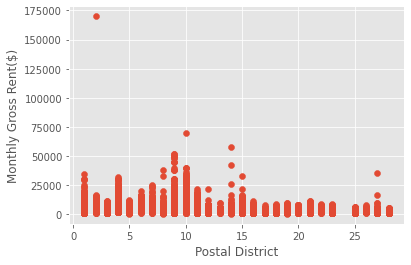

In [24]:
# Plotting
#p = "No. of Bedroom(for Non-Landed Only)"
p = "Postal District"
style.use("ggplot")
# Set up a scatter plot
pyplot.scatter(df[p], df["Monthly Gross Rent($)"])
pyplot.xlabel(p)
pyplot.ylabel('Monthly Gross Rent($)')
pyplot.show()